In [23]:
import cv2   #open CV library : image and video processing
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy.fft as fft
import scipy.fftpack 
import moviepy.editor as mp

# Time Series

In [24]:
def tsa(vid): 
    video = cv2.VideoCapture(vid) #open the video of the following path
    currentframe = 0

    fps = math.ceil(video.get(cv2.CAP_PROP_FPS))
    if(fps == 31 ) :
        fps = 30
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print('height:',height)
    print('width:',width)
    print('fps:',fps)
    red_values = np.zeros(length)
    heart_rates = []
    for i in range(length+1): #Collecting all red value data
        # reading from frame 
        ret,frame = video.read() 
        if ret: 
            red_values[i] = np.mean(np.mean(frame,axis=0),axis=0)[2]
        else: 
            break

        if i%(5*fps) == 0 : #every five seconds find heart rate
            times = np.arange(length)/fps
            b, a = signal.butter(1, 0.1)
            filtered = signal.filtfilt(b, a, red_values)
            peak_indices = signal.find_peaks(filtered)[0]
            peak_count = len(peak_indices)
            heart_rates.append(((peak_count)*fps*60/(i+1)))
    times = np.arange(length)/fps
    b, a = signal.butter(1, 0.080)
    filtered = signal.filtfilt(b, a, red_values)
    peak_indices = signal.find_peaks(filtered)[0]
    peak_count = len(peak_indices)
    heart_rates.append(((peak_count)*fps*60/(i+1)))
    plt.figure(figsize=(10, 4))
    
    plt.subplot(121)
    axes = plt.gca()
    axes.set_ylim([180,210])
    plt.plot(times, red_values)
    plt.title("Red Values with noise")
    plt.margins(0, .05)

    plt.subplot(122)
    axes = plt.gca()
    axes.set_ylim([180,210])
    plt.plot(times, filtered,color='pink')
    plt.title("Red Values without noise")
    plt.margins(0, .05)

    plt.show()
    print("Heart rate=",heart_rates[len(heart_rates)-1])
    plt.figure(figsize = (10,5))
    plt.plot([0,5,10,15,20,25,30,length/fps],heart_rates)
    plt.title("Heart rates plotted for every 5 second interval")
    #plt.margins(0, .05)
    plt.show()
    return heart_rates[len(heart_rates)-1]

# DFT 

In [25]:
def dft(vid):
    video = cv2.VideoCapture(vid) #open the video of the following path
    currentframe = 0

    fps = math.floor(video.get(cv2.CAP_PROP_FPS))
    if(fps == 31) :
        fps = 30
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(height,width,fps)
    red_values = np.zeros(length)
    heart_rates = []
    for i in range(length+1): #Collecting all red value data
        # reading from frame 
        ret,frame = video.read() 
        if ret: 
            red_values[i] = np.mean(np.mean(frame,axis=0),axis=0)[2]
        else: 
            break

        if i%(5*fps) == 0 : #every five seconds find heart rate
            times = np.arange(length)/fps
            b,a = signal.butter(3, [(48/60)/(0.5*fps), (250/60)/(0.5*fps)], btype = 'band')
            filtered = signal.filtfilt(b, a, red_values)
            Y = np.abs(scipy.fft.rfft(filtered))
            freq= scipy.fft.rfftfreq(len(Y), 1/fps)
            heart_rates.append(freq[np.argmax(Y)]*30)
    times = np.arange(length)/fps
    b,a = signal.butter(3, [(48/60)/(0.5*fps), (150/60)/(0.5*fps)], btype = 'band')
    filtered = signal.filtfilt(b, a, red_values)

    Y = np.abs(scipy.fft.rfft(filtered))
    freq= scipy.fft.rfftfreq(len(Y), 1/fps)
    heart_rates.append(freq[np.argmax(Y)]*30)

    plt.figure(figsize=(10, 4))
    axes = plt.gca()
    axes.set_ylim([180,210])
    plt.subplot(121)
    plt.plot(times, red_values)
    plt.title("Red Values with noise")
    plt.margins(0, .05)

    plt.subplot(122)
    plt.plot(times, filtered,color='pink')
    plt.title("Red Values without noise")
    plt.margins(0, .05)

    plt.show()
    print("Heart rate=",heart_rates[len(heart_rates)-1])
    plt.figure(figsize = (10,5))
    plt.plot([0,5,10,15,20,25,30,length/fps],heart_rates)
    plt.title("Heart rates plotted for every 5 second interval")


    #plt.margins(0, .05)
    plt.show()
    return heart_rates[len(heart_rates)-1]

# Applying tsa on the data

In [ ]:
l=['Sample1.MOV','Sample2.MOV','Sample3.MOV','Sample4.MOV','Sample5.MOV','Sample6.MOV','Sample7.MOV','Sample8.MOV','Sample9.MOV','Sample10.MOV']
tsa_values = []
for i in range(len(l)):
    print("Video number: '%d' \n Resolution : 1080p \n FPS : 60",i+1)
    tsa_values.append(tsa(l[i]))#1080p 30fps
    print(tsa_values)
    clip = mp.VideoFileClip(l[i])
    clip.write_videofile("temp.mp4", fps=45)
    print("Video number: %d \n Resolution : 1080p \n FPS : 45",i+1)
    tsa_values.append(tsa("temp.mp4"))#1080p 25fps
    clip.write_videofile("temp.mp4", fps=30)
    print("Video number: %d \n Resolution : 1080p \n FPS : 30",i+1)
    tsa_values.append(tsa("temp.mp4"))#1080p 20fps
    clip.write_videofile("temp.mp4", fps=15)
    print("Video number: '%d' \n Resolution : 1080p \n FPS : 15",i+1)
    tsa_values.append(tsa("temp.mp4"))#1080p 8fps
    clip.write_videofile("temp.mp4", fps=8)
    print("Video number: '%d' \n Resolution : 1080p \n FPS : 8",i+1)
    tsa_values.append(tsa("temp.mp4"))#1080p 8fps
    
    #  720p resolution
    clip_resized = clip.resize(newsize=(720,1280))
    clip_resized.write_videofile("temp.mp4")
    
    print("Video number: %d \n Resolution : 720p \n FPS : 60",i+1)
    tsa_values.append(tsa("temp.mp4"))#720p 30fps
    
    print("Video number: %d \n Resolution : 720p \n FPS : 45",i+1)
    clip_resized.write_videofile("temp.mp4", fps=45)
    tsa_values.append(tsa("temp.mp4"))#720p 25fps
    
    print("Video number: %d \n Resolution : 720p \n FPS : 30",i+1)
    clip_resized.write_videofile("temp.mp4", fps=30)
    tsa_values.append(tsa("temp.mp4"))#720p 20fps
    
    print("Video number: %d \n Resolution : 720p \n FPS : 15",i+1)
    clip_resized.write_videofile("temp.mp4", fps=15)
    tsa_values.append(tsa("temp.mp4"))#720p 15fps
    
    print("Video number: '%d' \n Resolution : 720p \n FPS : 8",i+1)
    clip_resized.write_videofile("temp.mp4", fps=8)
    tsa_values.append(tsa("temp.mp4"))#720p 8fps
    
    #480p resolution
    clip_resized = clip.resize(newsize=(480,720))
    print("Video number: %d \n Resolution : 480p \n FPS : 60",i+1)
    clip_resized.write_videofile("temp.mp4")
    tsa_values.append(tsa("temp.mp4"))#480p 30fps
    print("Video number: %d \n Resolution : 480p \n FPS : 45",i+1)
    clip_resized.write_videofile("temp.mp4", fps=45)
    tsa_values.append(tsa("temp.mp4"))#480p 25fps
    print("Video number: %d \n Resolution : 480p \n FPS : 30",i+1)
    clip_resized.write_videofile("temp.mp4", fps=30)
    tsa_values.append(tsa("temp.mp4"))#480p 20fps
    print("Video number: %d \n Resolution : 480p \n FPS : 15",i+1)
    clip_resized.write_videofile("temp.mp4", fps=15)
    tsa_values.append(tsa("temp.mp4"))
    clip_resized.write_videofile("temp.mp4", fps=8)
    print("Video number: '%d' \n Resolution : 480p \n FPS : 8",i+1)
    tsa_values.append(tsa("temp.mp4"))#1080p 8fps
    
print(tsa_values)

*******************
Video number: 1
1920 1080 59


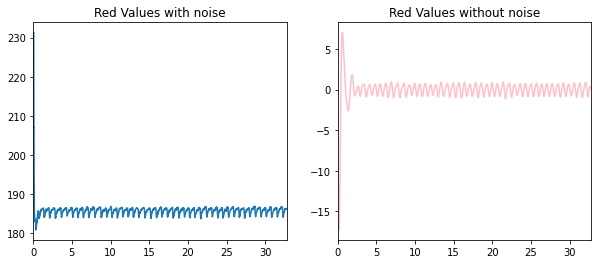

Heart rate= 84.02476780185758


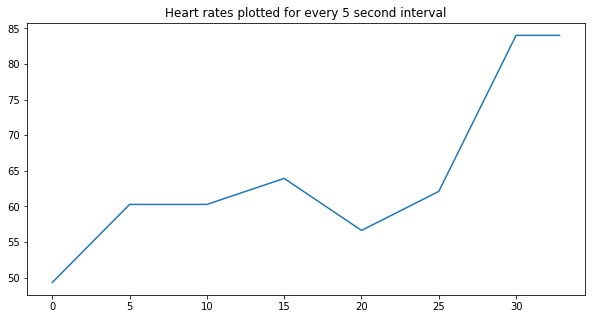

[84.02476780185758]
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1454 [00:00<00:27, 52.04it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 1
1080 1920 45


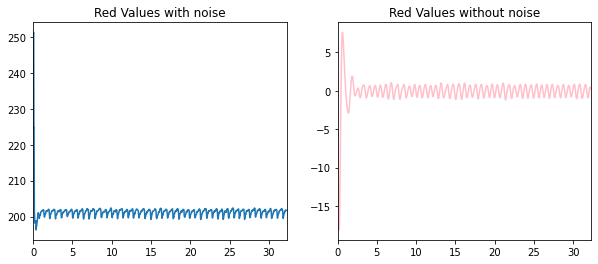

Heart rate= 85.30219780219781


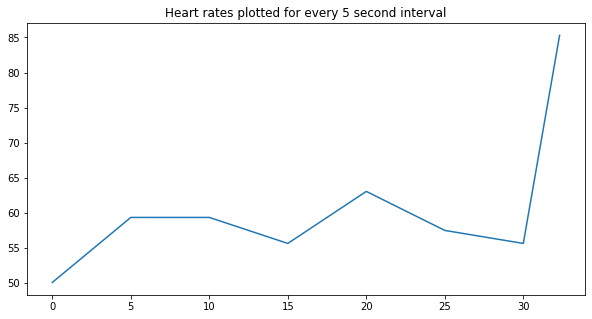

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/969 [00:00<00:53, 18.02it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 1
1080 1920 30


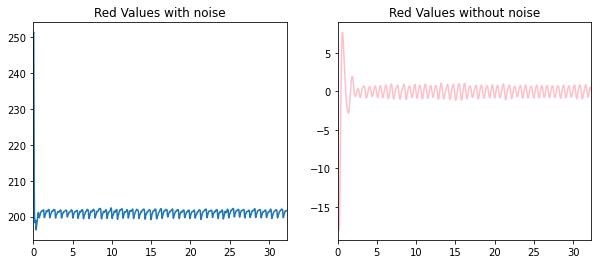

Heart rate= 85.36082474226804


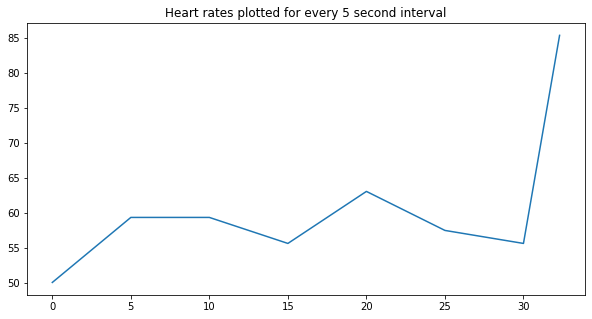

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/485 [00:00<00:27, 17.58it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 1
1080 1920 15


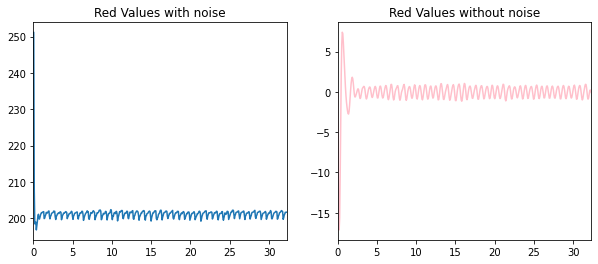

Heart rate= 85.18518518518519


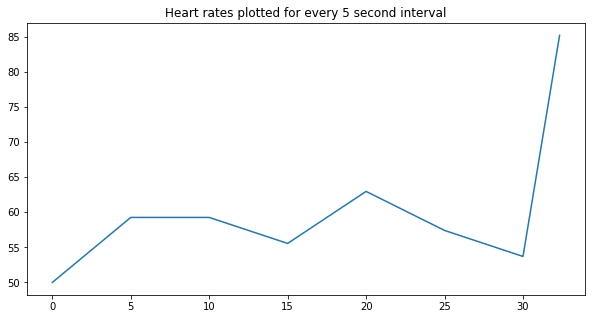

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 5/1936 [00:00<00:43, 44.70it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:1
1280 720 59


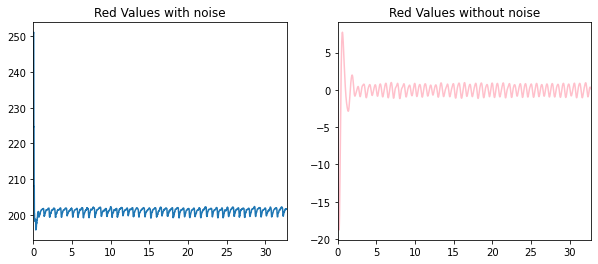

Heart rate= 84.02476780185758


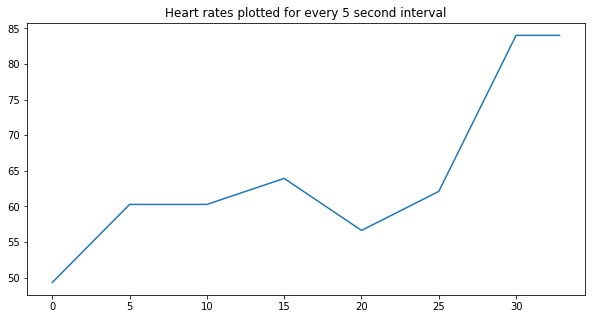

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/1454 [00:00<00:57, 25.07it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
1280 720 45


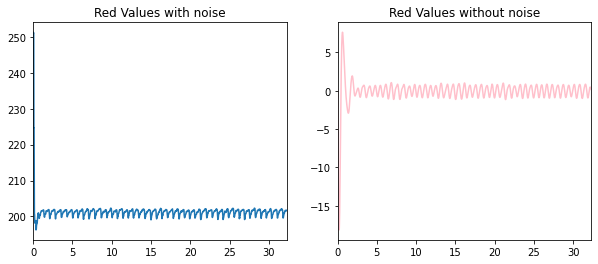

Heart rate= 85.30219780219781


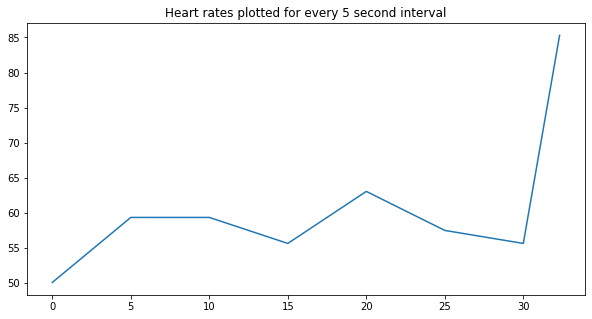

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/969 [00:00<?, ?it/s, now=None]                

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
1280 720 30


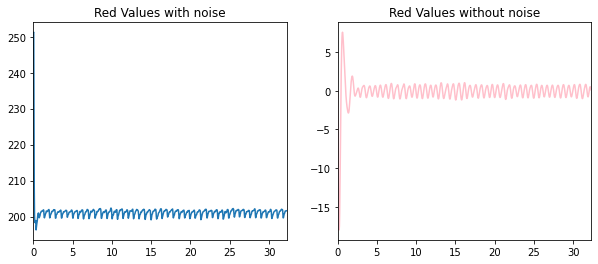

Heart rate= 85.36082474226804


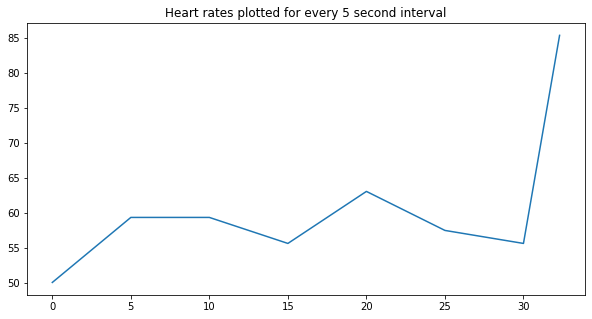

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/485 [00:00<00:25, 19.28it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
1280 720 15


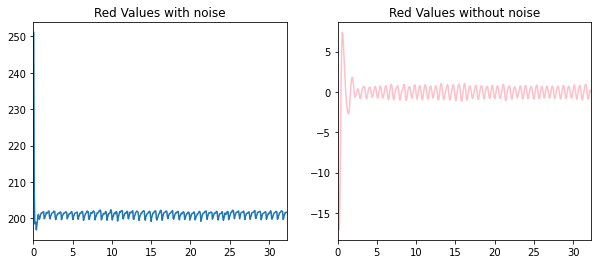

Heart rate= 85.18518518518519


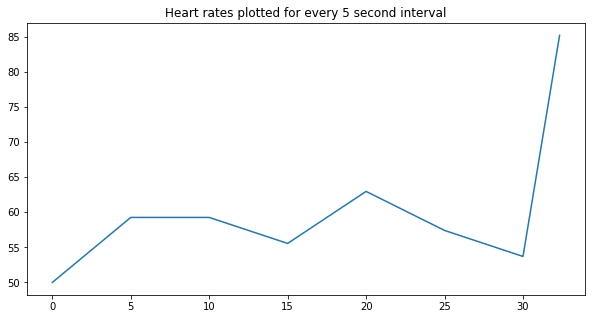

*******************
*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 5/1936 [00:00<00:42, 45.66it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
720 480 59


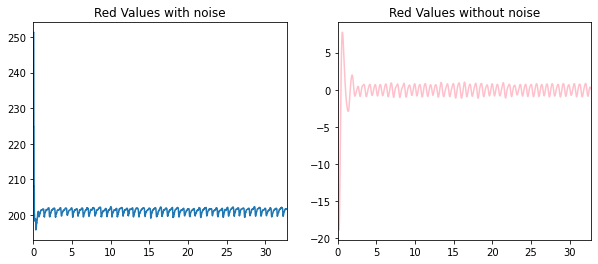

Heart rate= 84.02476780185758


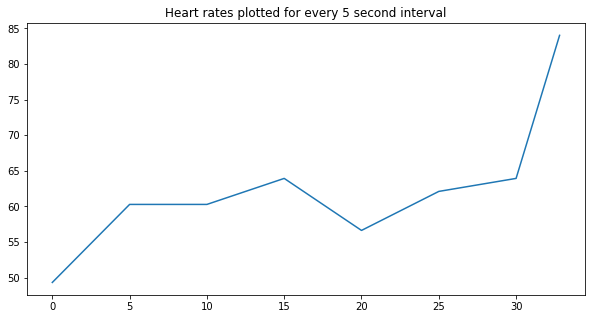

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1454 [00:00<01:17, 18.65it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
720 480 45


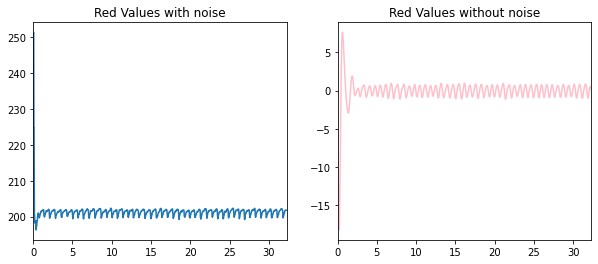

Heart rate= 85.30219780219781


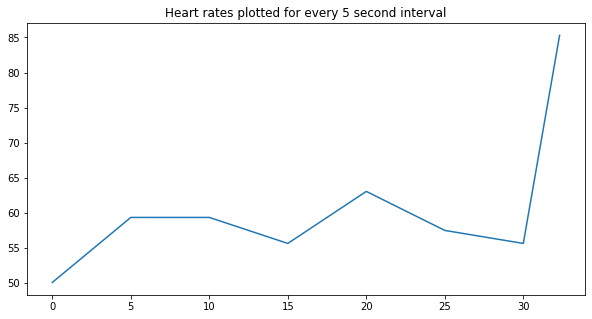

chunk:   9%|▊         | 62/712 [00:00<00:01, 616.53it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/969 [00:00<00:51, 18.81it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
720 480 30


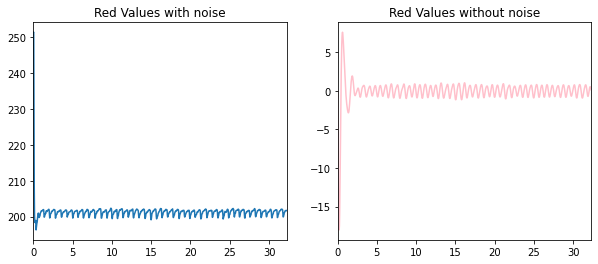

Heart rate= 85.36082474226804


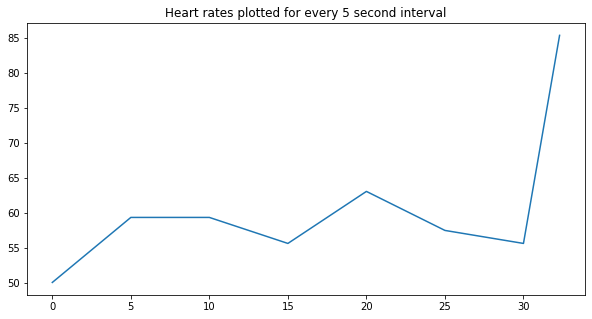

chunk:   0%|          | 0/712 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/485 [00:00<00:29, 16.28it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 1
720 480 15


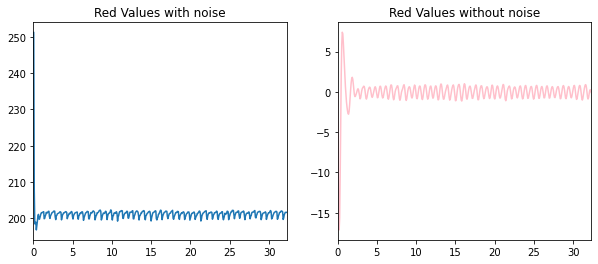

Heart rate= 85.18518518518519


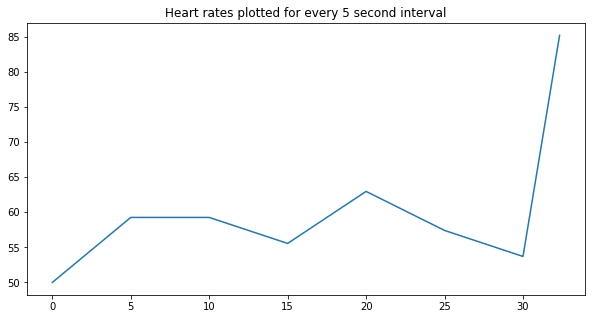

*******************
Video number: 2
1920 1080 59


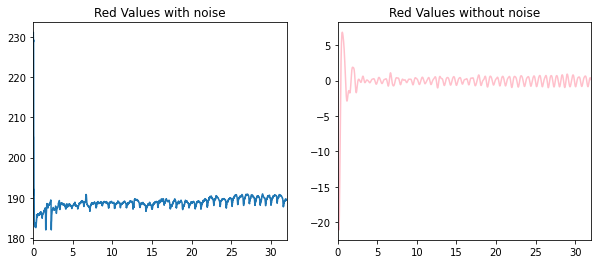

Heart rate= 76.71247357293868


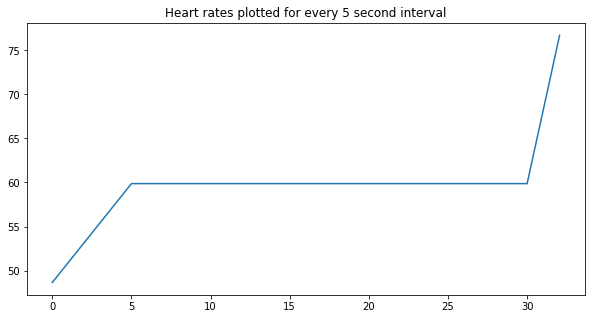

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868]


chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1420 [00:00<00:28, 50.33it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 2
1080 1920 45


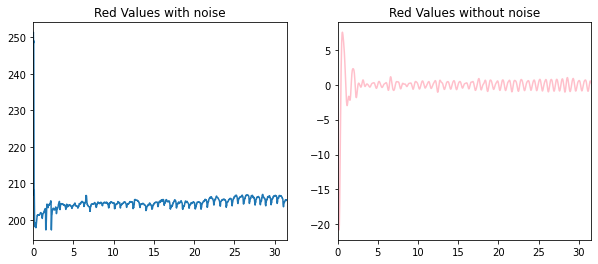

Heart rate= 77.84810126582278


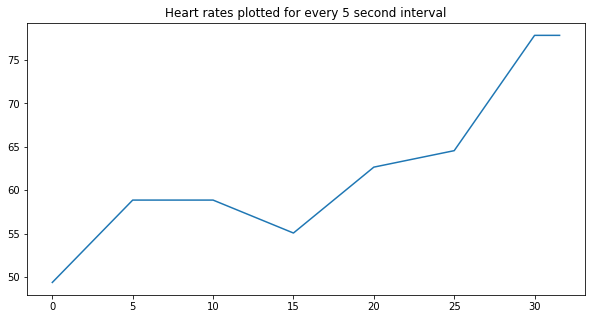

chunk:  17%|█▋        | 115/696 [00:00<00:00, 1138.99it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/947 [00:00<00:40, 23.45it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 2
1080 1920 30


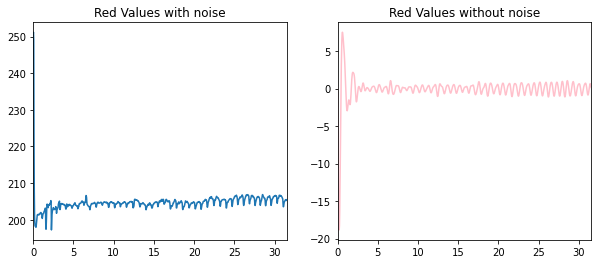

Heart rate= 77.84810126582279


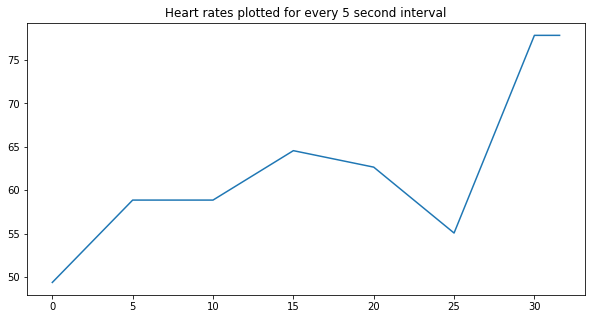

chunk:  15%|█▌        | 105/696 [00:00<00:00, 1048.92it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:32, 14.38it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 2
1080 1920 15


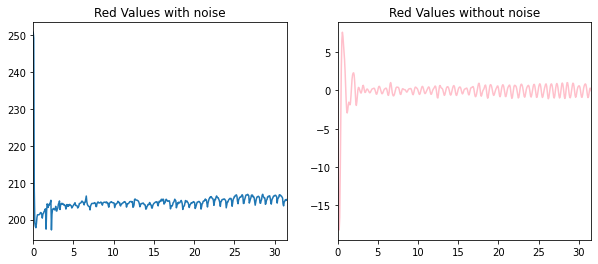

Heart rate= 77.52100840336134


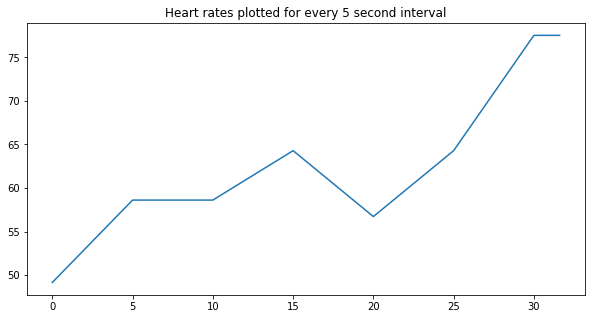

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1891 [00:00<00:33, 55.95it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:2
1280 720 59


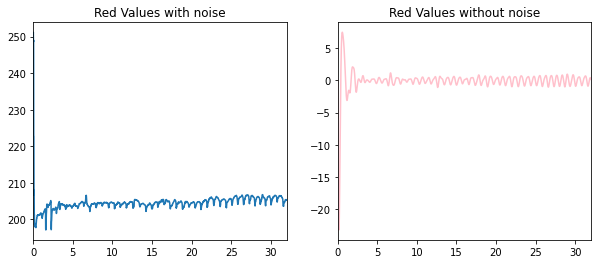

Heart rate= 76.71247357293868


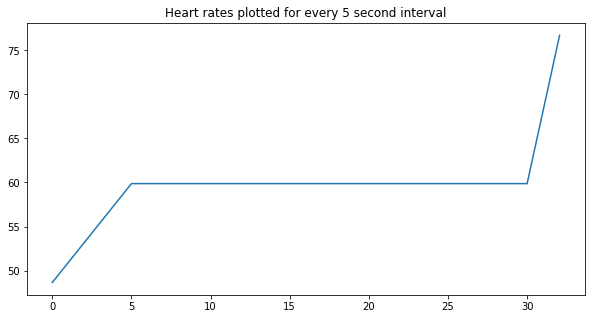

chunk:  18%|█▊        | 125/696 [00:00<00:00, 1242.95it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1420 [00:00<01:22, 17.29it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
1280 720 45


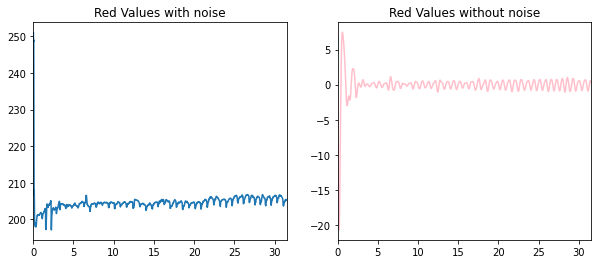

Heart rate= 77.84810126582278


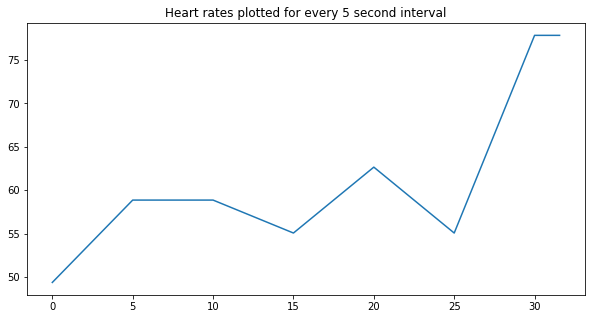

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/947 [00:00<00:37, 25.16it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
1280 720 30


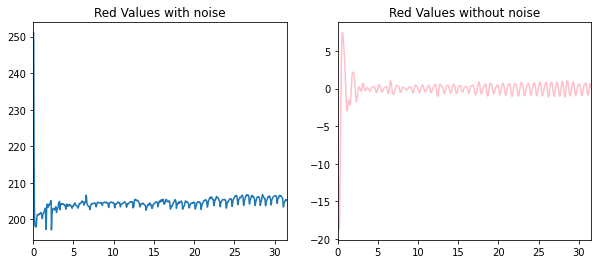

Heart rate= 77.84810126582279


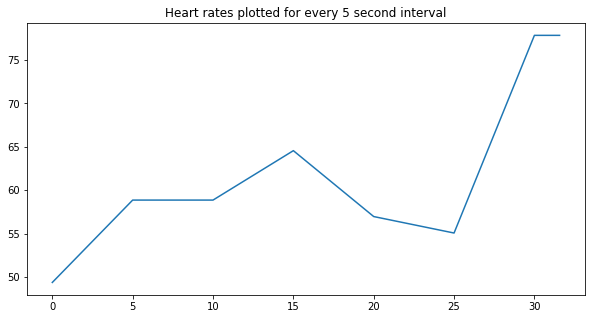

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:24, 19.62it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
1280 720 15


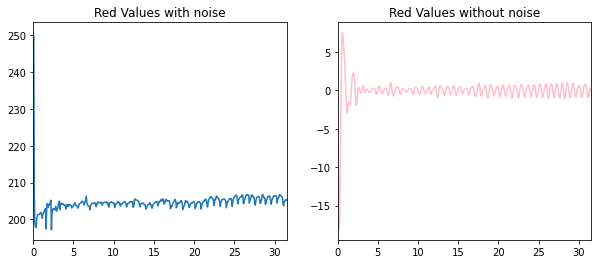

Heart rate= 77.52100840336134


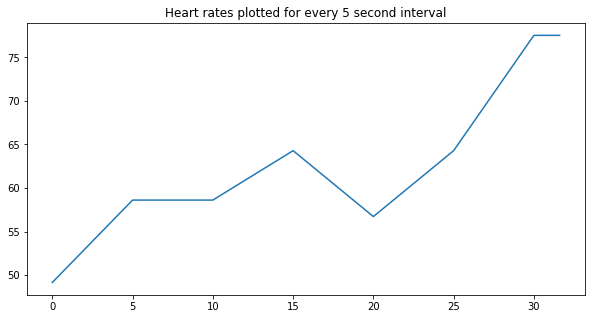

*******************
*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 4/1891 [00:00<00:51, 36.41it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
720 480 59


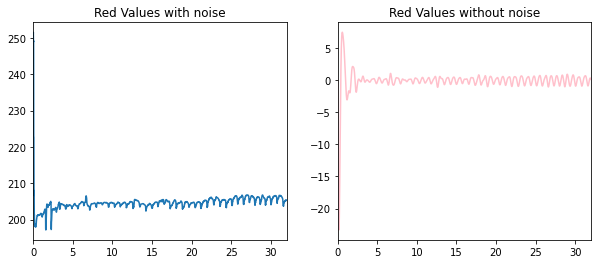

Heart rate= 76.71247357293868


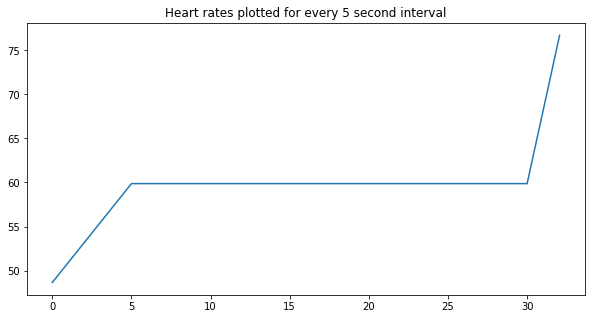

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1420 [00:00<01:26, 16.48it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
720 480 45


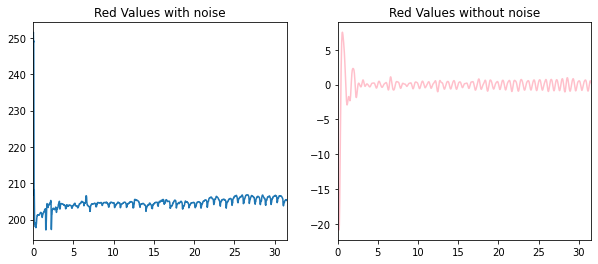

Heart rate= 77.84810126582278


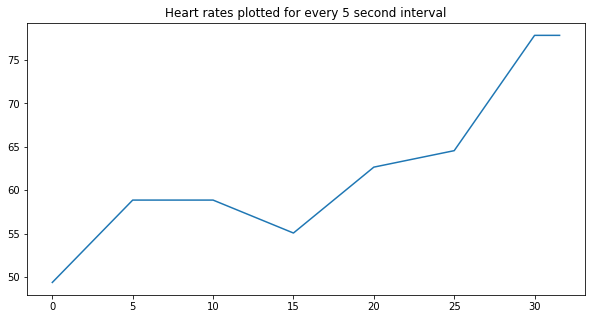

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/947 [00:00<00:53, 17.67it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
720 480 30


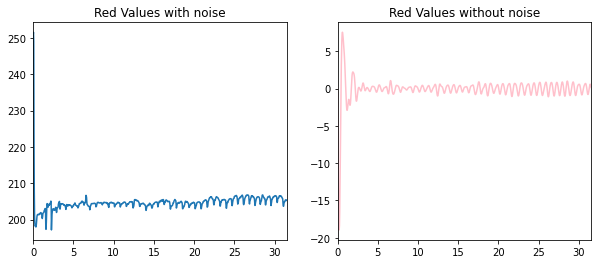

Heart rate= 77.84810126582279


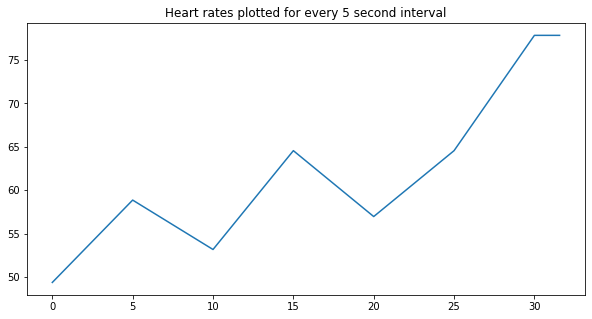

chunk:   0%|          | 0/696 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:25, 18.58it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 2
720 480 15


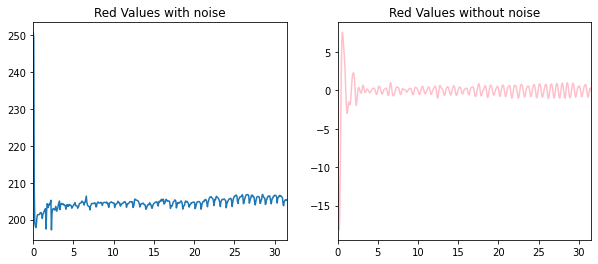

Heart rate= 77.52100840336134


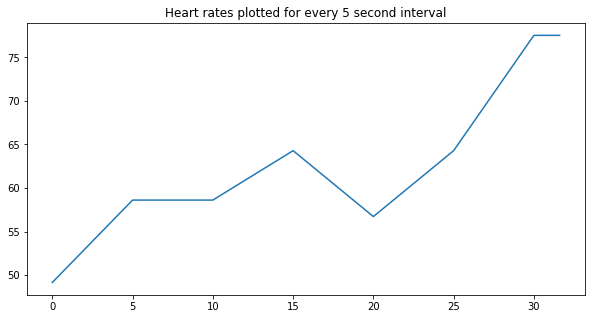

*******************
Video number: 3
1920 1080 59


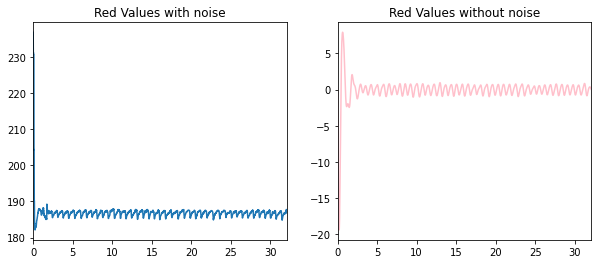

Heart rate= 82.15189873417722


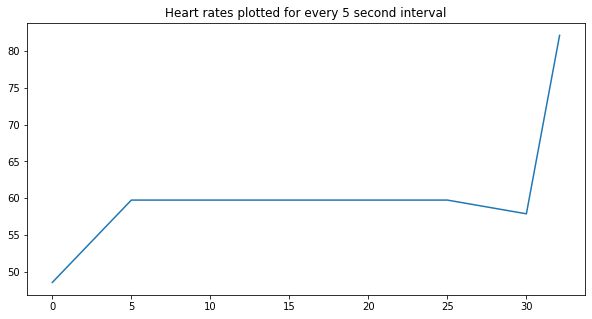

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722]


chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1422 [00:00<00:29, 48.12it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 3
1080 1920 45


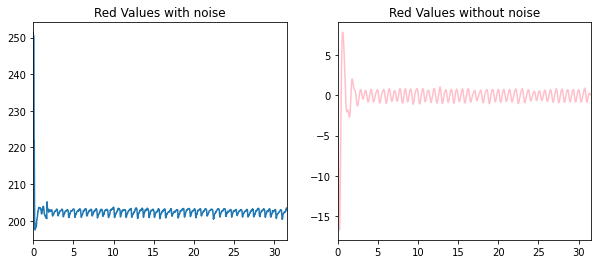

Heart rate= 83.42696629213484


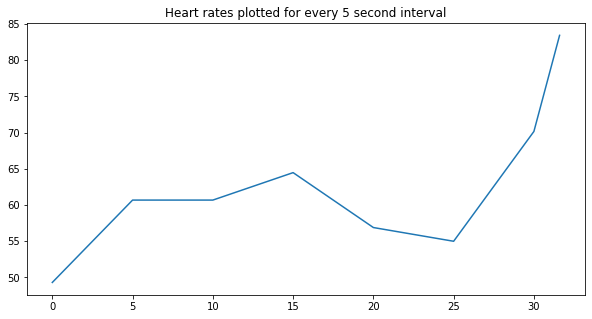

chunk:   5%|▍         | 32/697 [00:00<00:02, 292.44it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/948 [00:00<?, ?it/s, now=None]                

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 3
1080 1920 30


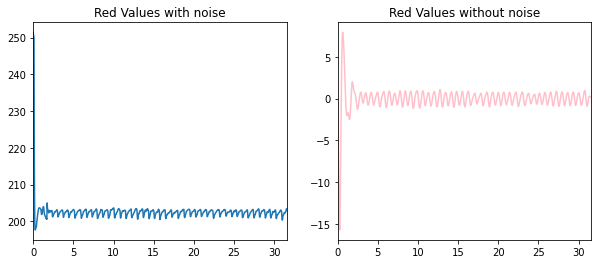

Heart rate= 83.36842105263159


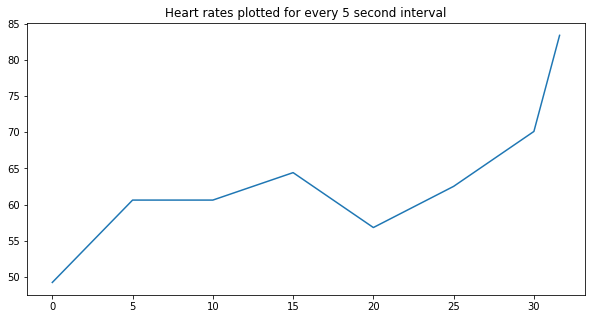

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:26, 17.85it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 3
1080 1920 15


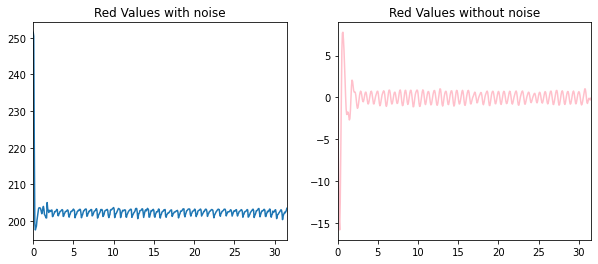

Heart rate= 83.19327731092437


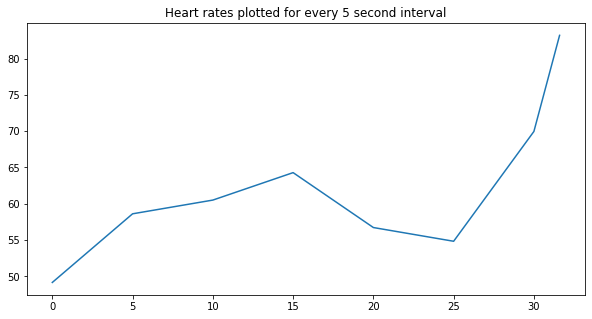

chunk:   9%|▉         | 66/697 [00:00<00:00, 649.71it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1894 [00:00<00:35, 53.72it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:3
1280 720 59


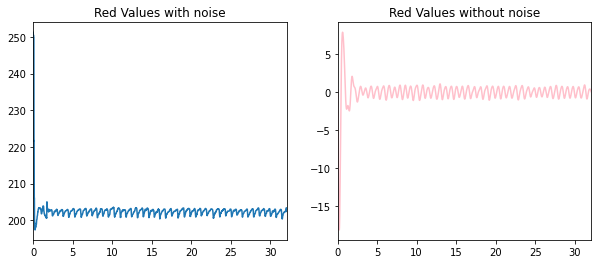

Heart rate= 82.15189873417722


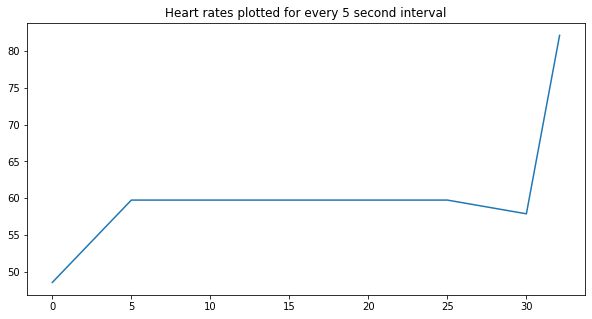

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1422 [00:00<01:21, 17.45it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
1280 720 45


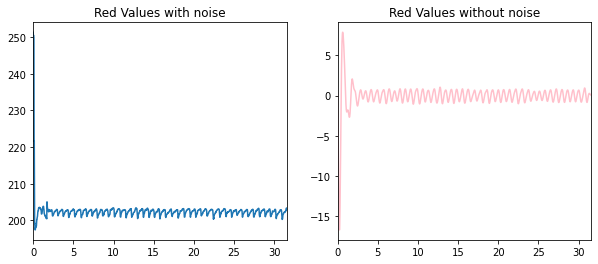

Heart rate= 83.42696629213484


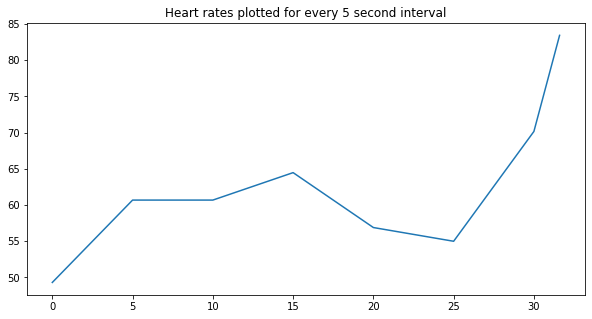

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/948 [00:00<00:41, 22.82it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
1280 720 30


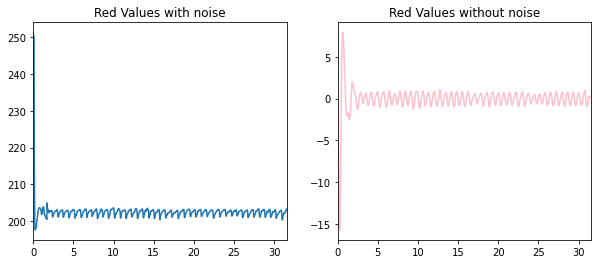

Heart rate= 83.36842105263159


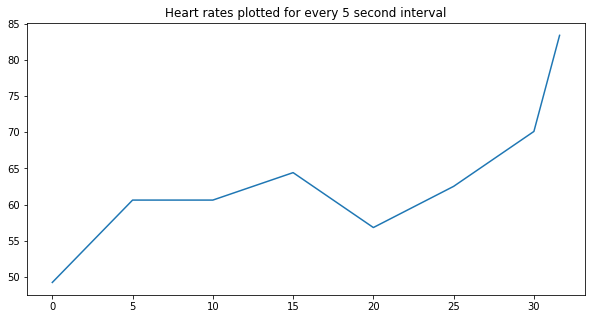

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:37, 12.71it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
1280 720 15


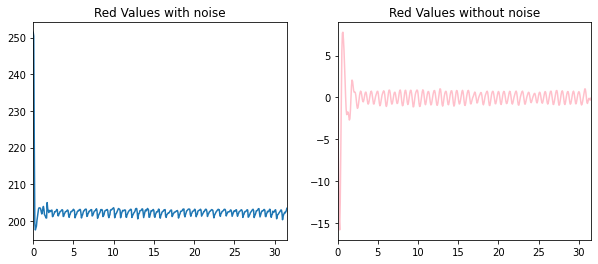

Heart rate= 83.19327731092437


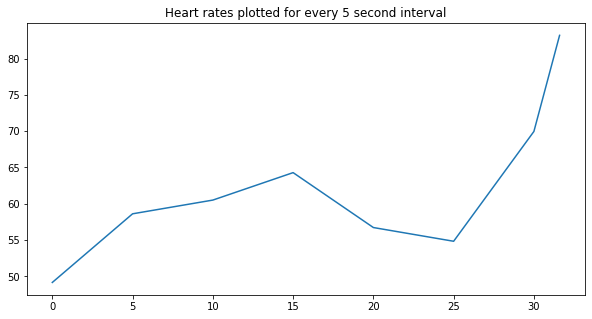

*******************
*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1894 [00:00<00:36, 51.25it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
720 480 59


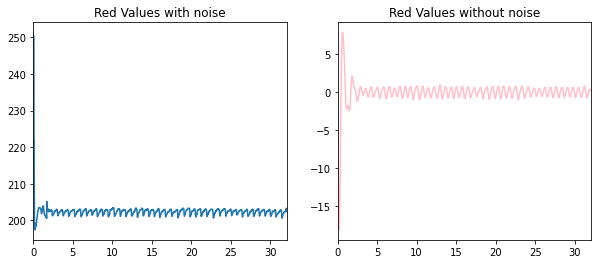

Heart rate= 82.15189873417722


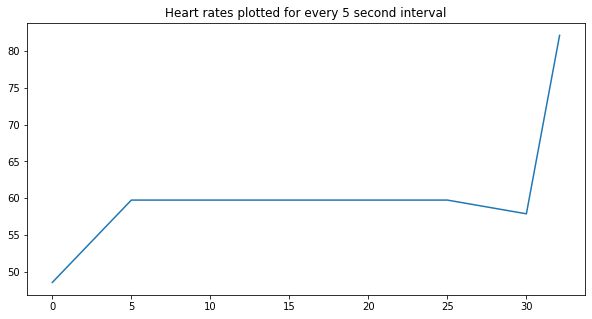

chunk:   7%|▋         | 50/697 [00:00<00:01, 491.96it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1422 [00:00<01:34, 15.01it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
720 480 45


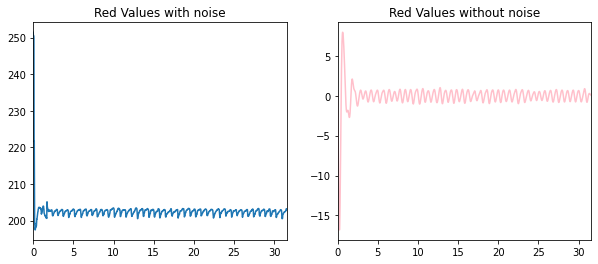

Heart rate= 83.42696629213484


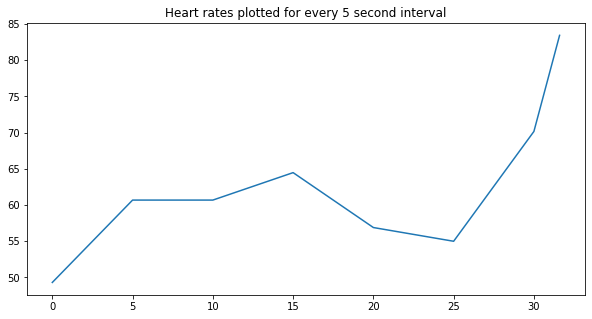

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/948 [00:00<00:58, 16.09it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
720 480 30


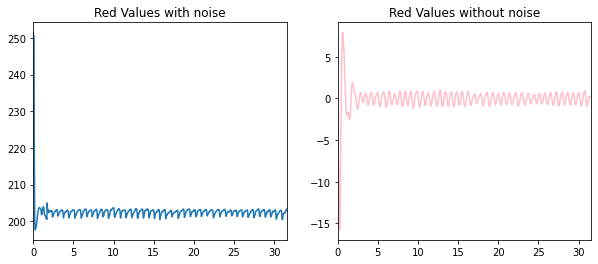

Heart rate= 83.36842105263159


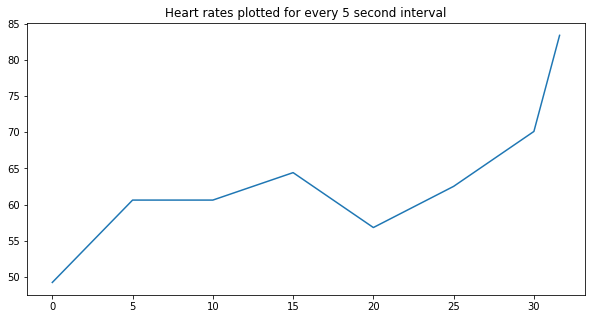

chunk:   0%|          | 0/697 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/474 [00:00<00:28, 16.53it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 3
720 480 15


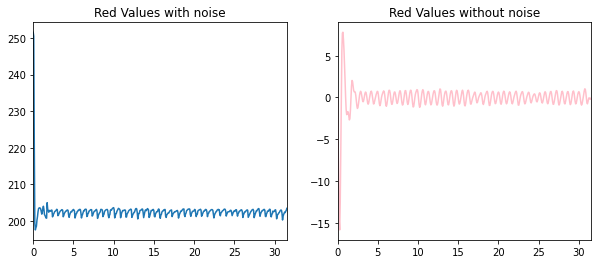

Heart rate= 83.19327731092437


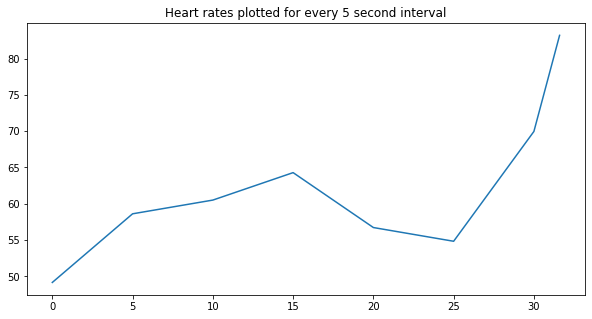

*******************
Video number: 4
1920 1080 59


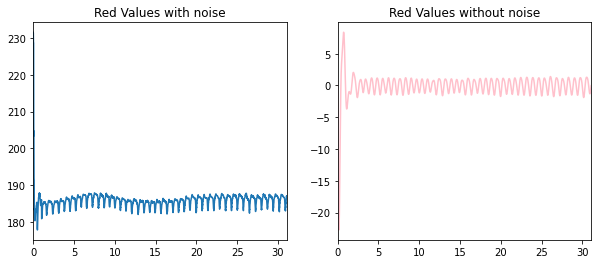

Heart rate= 84.83660130718954


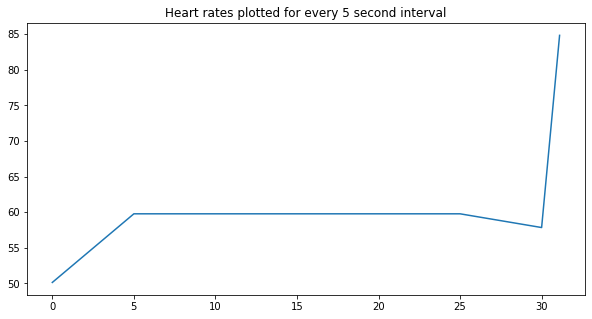

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 84.83660130718954]


chunk:   0%|          | 0/675 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1377 [00:00<00:30, 44.68it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 4
1080 1920 45


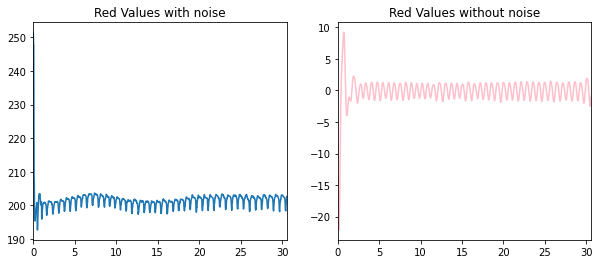

Heart rate= 86.21190130624093


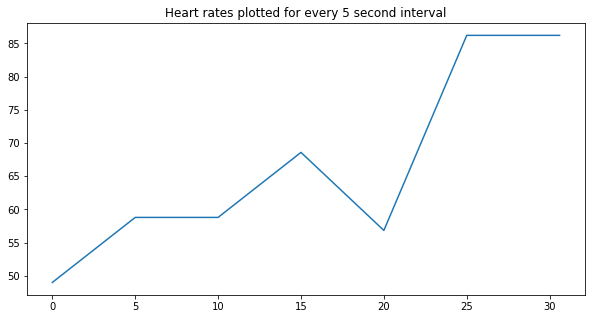

chunk:   8%|▊         | 52/675 [00:00<00:01, 516.13it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/918 [00:00<01:04, 14.24it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 4
1080 1920 30


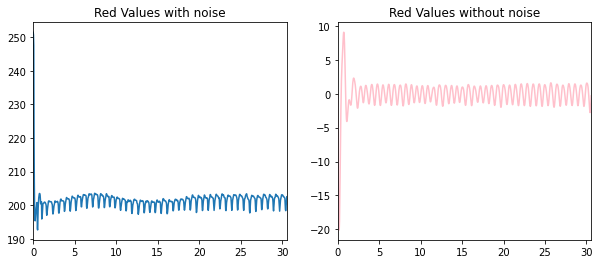

Heart rate= 86.08695652173913


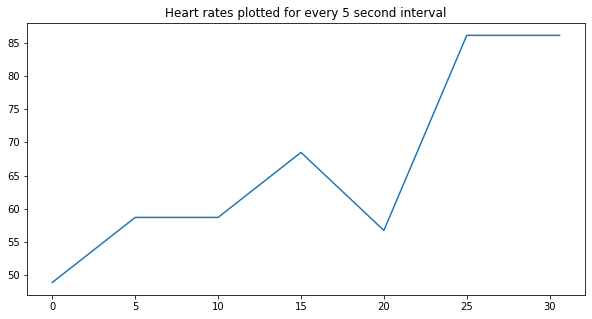

chunk:   5%|▍         | 32/675 [00:00<00:02, 220.21it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/459 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 4
1080 1920 15


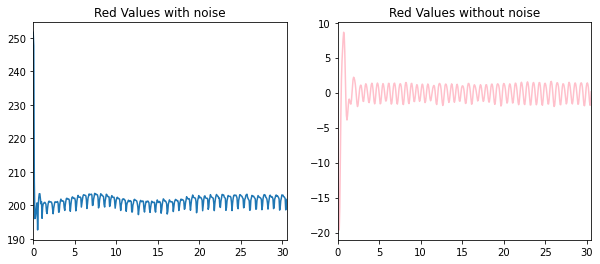

Heart rate= 86.08695652173913


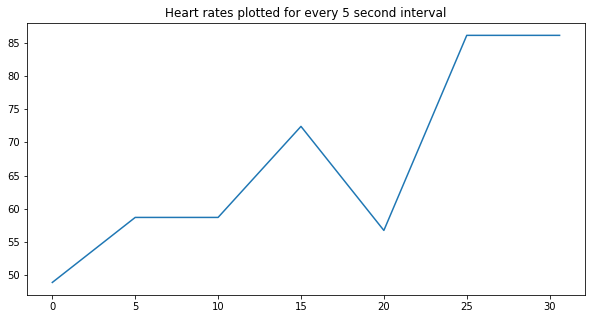

chunk:  17%|█▋        | 117/675 [00:00<00:00, 1167.31it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 7/1835 [00:00<00:33, 53.96it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:4
1280 720 59


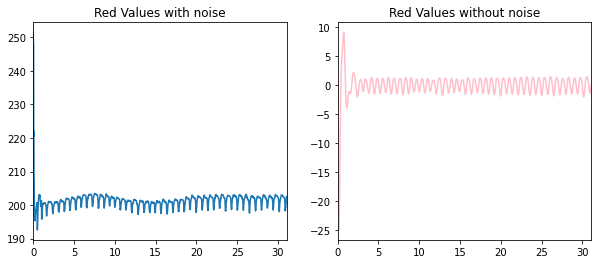

Heart rate= 84.83660130718954


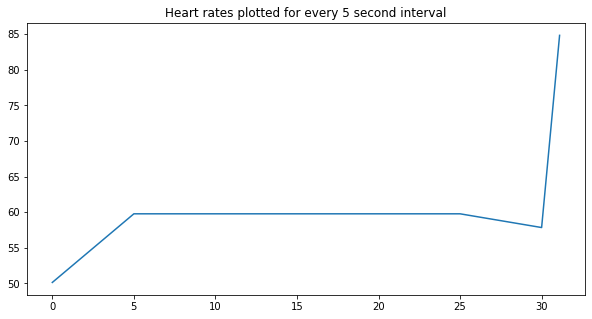

chunk:  17%|█▋        | 117/675 [00:00<00:00, 1167.46it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/1377 [00:00<00:56, 24.47it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
1280 720 45


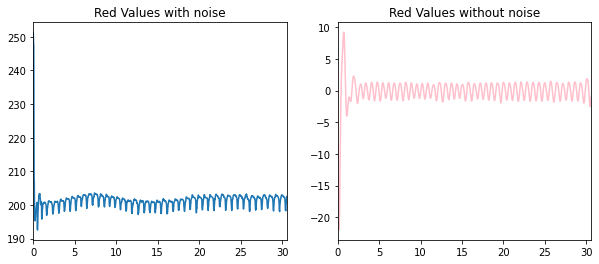

Heart rate= 86.21190130624093


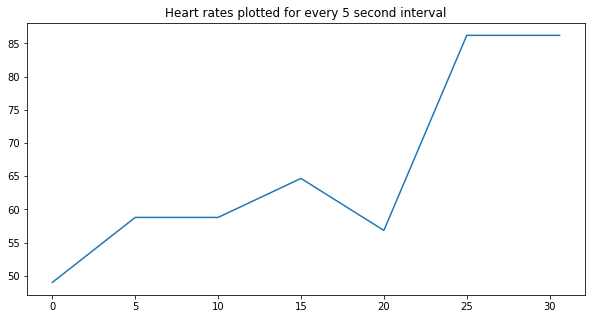

chunk:  15%|█▌        | 102/675 [00:00<00:00, 1014.73it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/918 [00:00<01:03, 14.37it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
1280 720 30


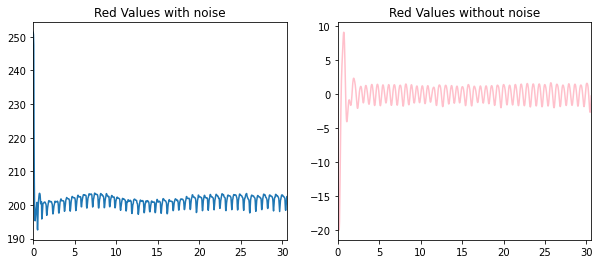

Heart rate= 86.08695652173913


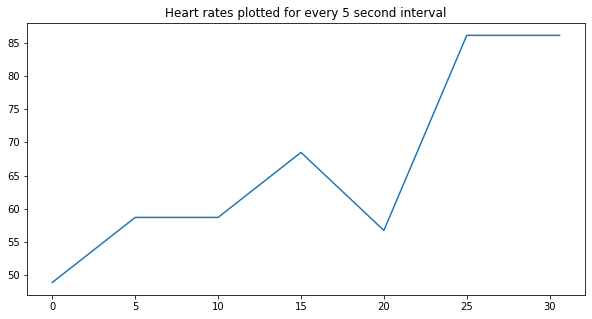

chunk:   0%|          | 0/675 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/459 [00:00<00:29, 15.60it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
1280 720 15


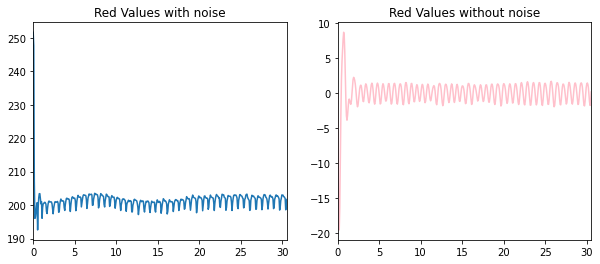

Heart rate= 86.08695652173913


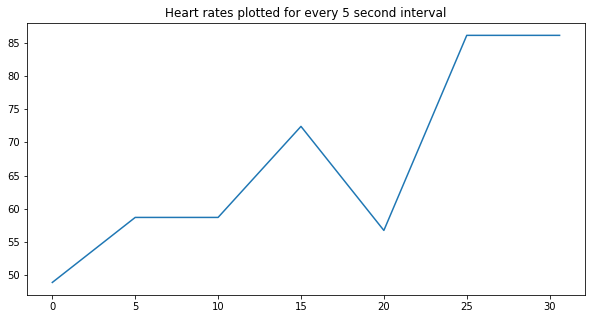

*******************


chunk:   0%|          | 0/675 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 5/1835 [00:00<00:37, 48.96it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
720 480 59


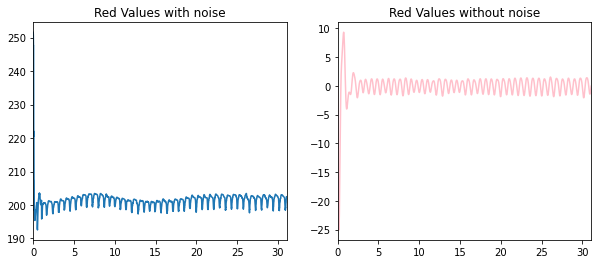

Heart rate= 84.83660130718954


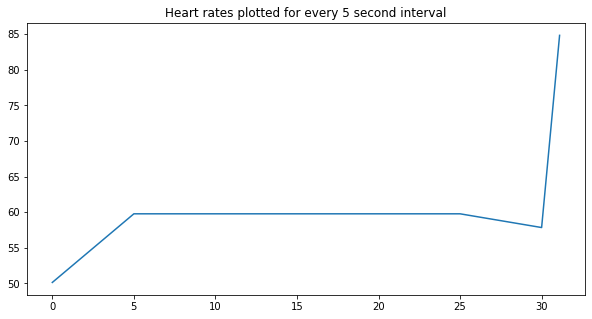

chunk:   0%|          | 0/675 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/1377 [00:00<01:01, 22.26it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
720 480 45


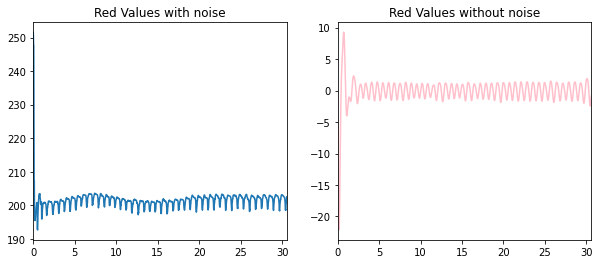

Heart rate= 86.21190130624093


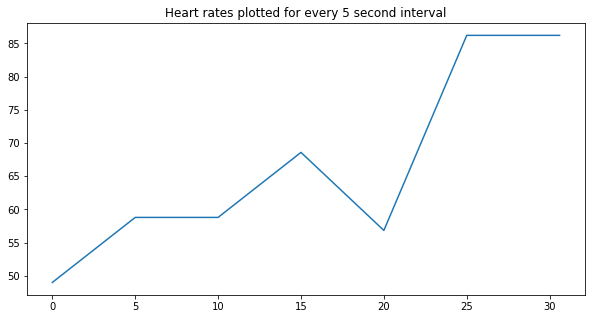

chunk:   0%|          | 0/675 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/918 [00:00<00:59, 15.37it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
720 480 30


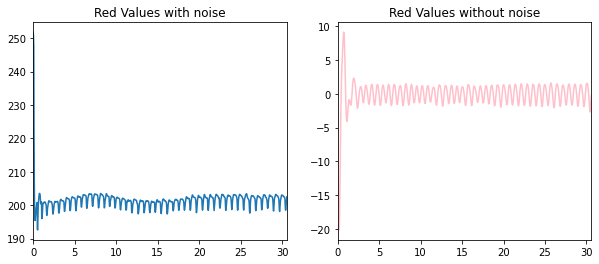

Heart rate= 86.08695652173913


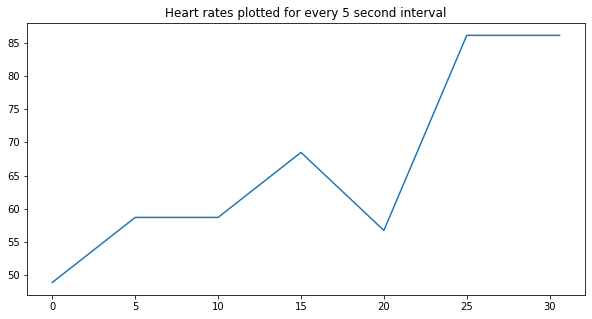

chunk:  15%|█▍        | 101/675 [00:00<00:00, 997.73it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/459 [00:00<00:27, 16.57it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 4
720 480 15


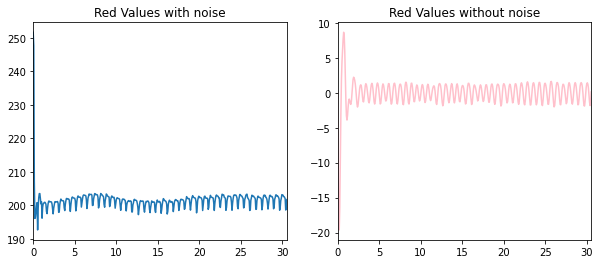

Heart rate= 86.08695652173913


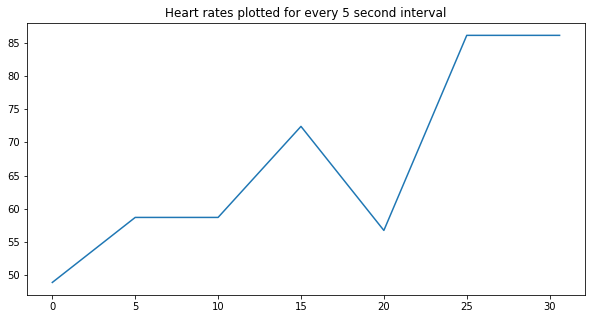

*******************
Video number: 5
1920 1080 59


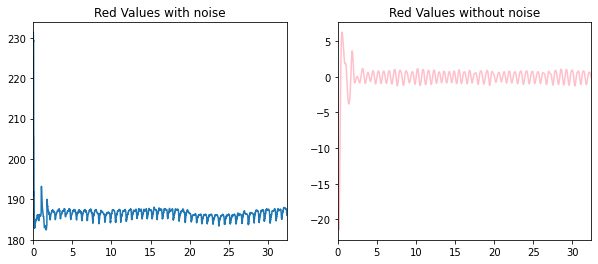

Heart rate= 81.37931034482759


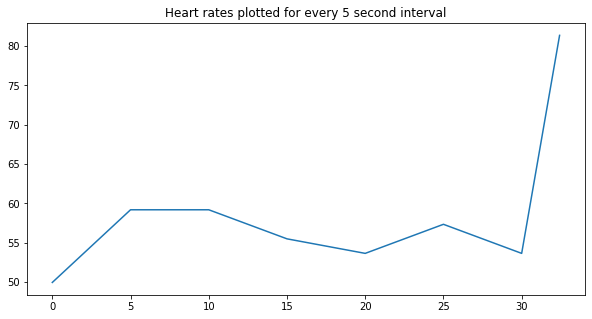

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 81.37931034482759]


chunk:  17%|█▋        | 117/704 [00:00<00:00, 1164.82it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 5/1436 [00:00<00:34, 41.76it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 5
1080 1920 45


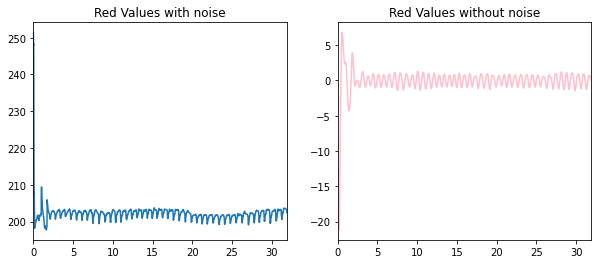

Heart rate= 82.61474269819193


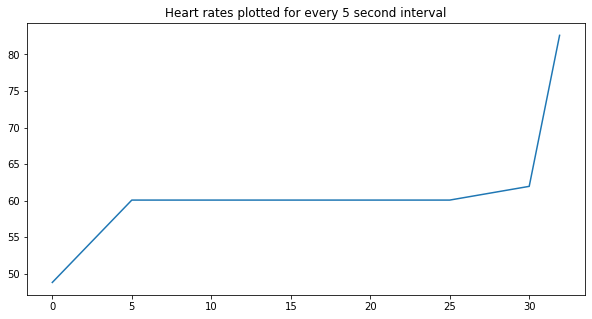

chunk:   0%|          | 0/704 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/957 [00:00<01:08, 13.99it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 5
1080 1920 30


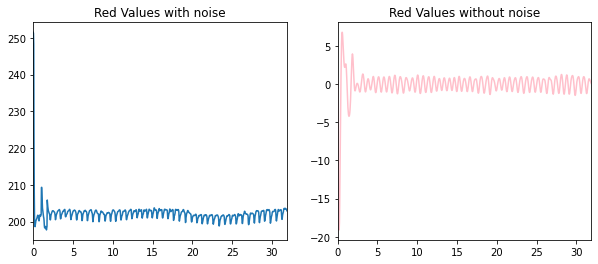

Heart rate= 82.6722338204593


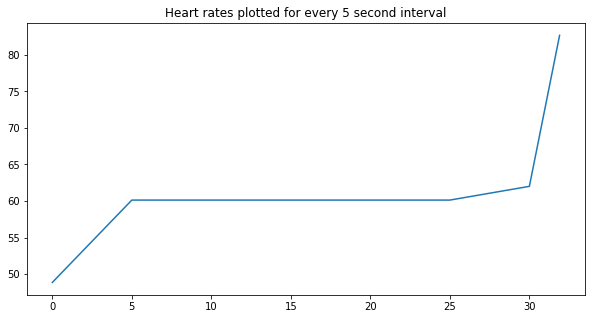

chunk:  13%|█▎        | 91/704 [00:00<00:00, 908.37it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/479 [00:00<00:29, 16.22it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 5
1080 1920 15


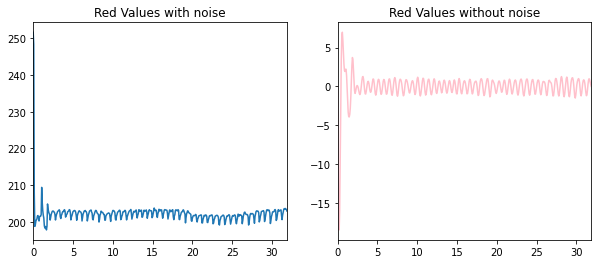

Heart rate= 82.5


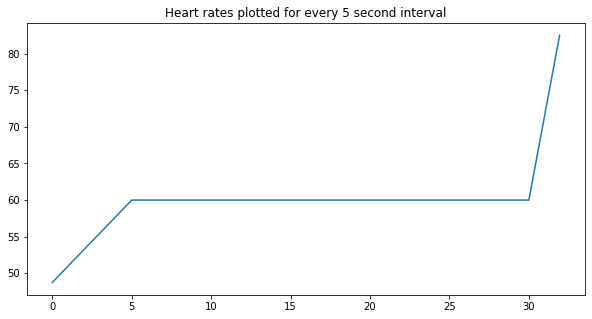

chunk:  13%|█▎        | 93/704 [00:00<00:00, 928.08it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1913 [00:00<00:35, 53.89it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:5
1280 720 59


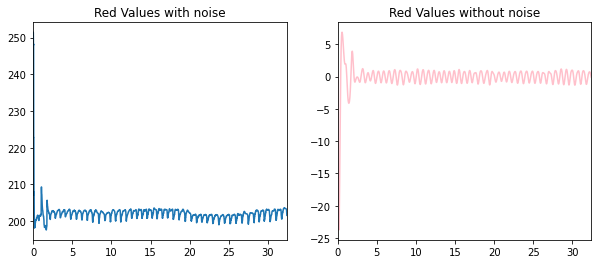

Heart rate= 81.37931034482759


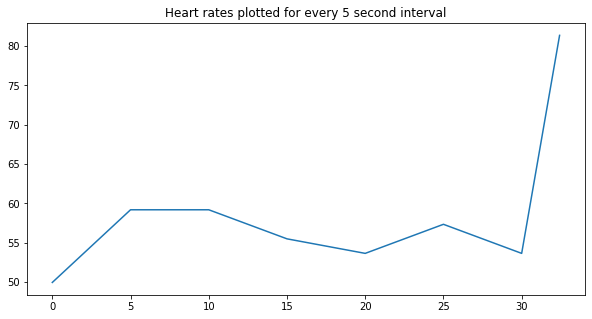

chunk:  12%|█▏        | 87/704 [00:00<00:00, 865.04it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1436 [00:00<01:25, 16.69it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
1280 720 45


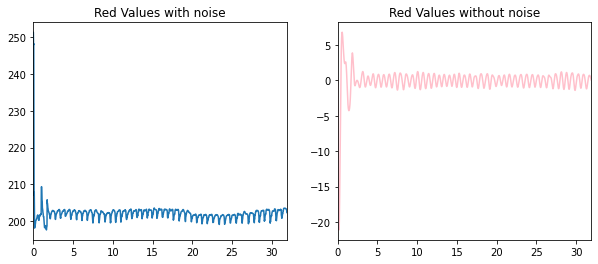

Heart rate= 82.61474269819193


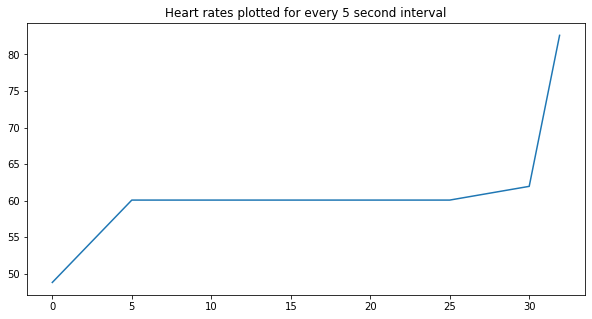

chunk:  15%|█▌        | 109/704 [00:00<00:00, 1085.67it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/957 [00:00<00:55, 17.18it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
1280 720 30


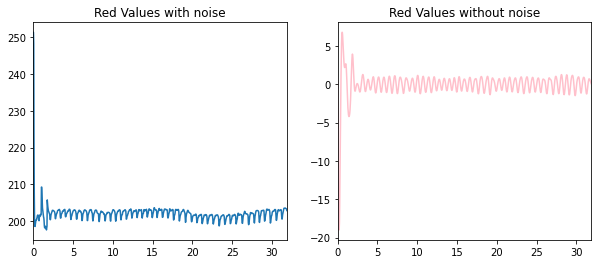

Heart rate= 82.6722338204593


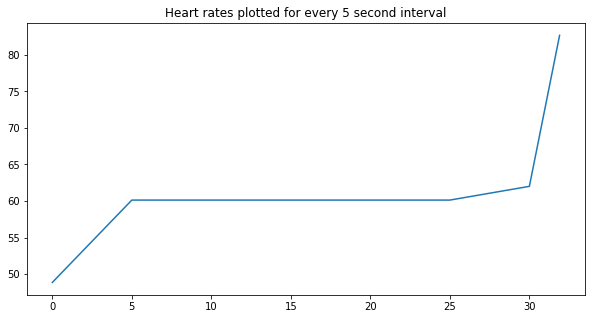

chunk:  14%|█▍        | 102/704 [00:00<00:00, 995.18it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/479 [00:00<00:33, 14.39it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
1280 720 15


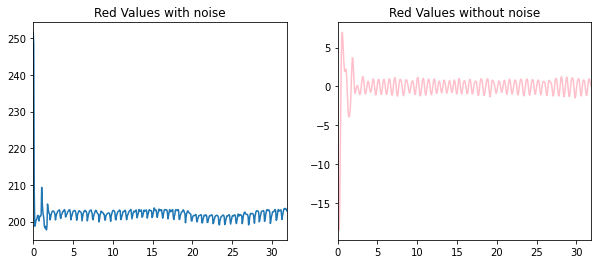

Heart rate= 82.5


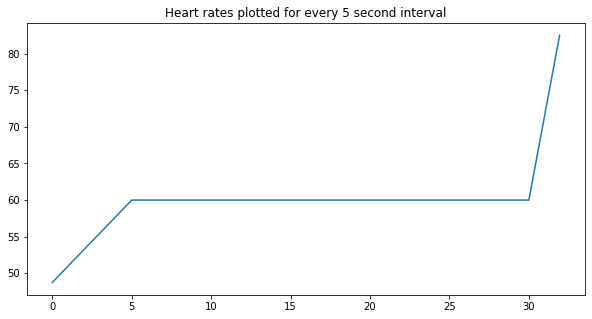

*******************


chunk:   0%|          | 0/704 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1913 [00:00<00:33, 56.63it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
720 480 59


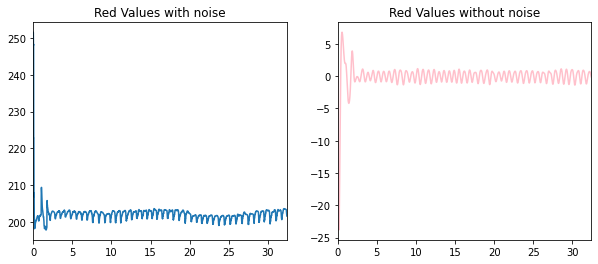

Heart rate= 81.37931034482759


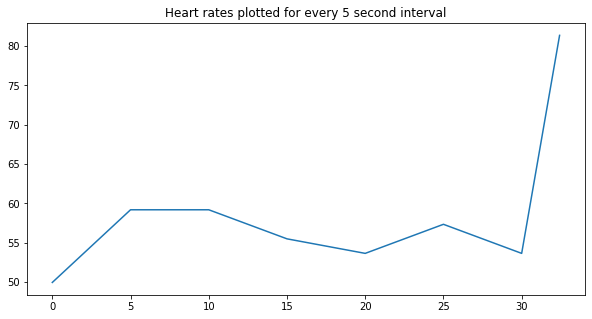

chunk:   0%|          | 0/704 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1436 [00:00<01:16, 18.71it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
720 480 45


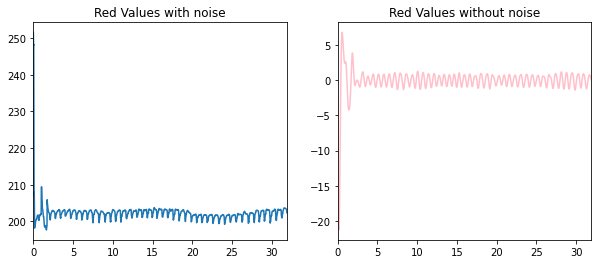

Heart rate= 82.61474269819193


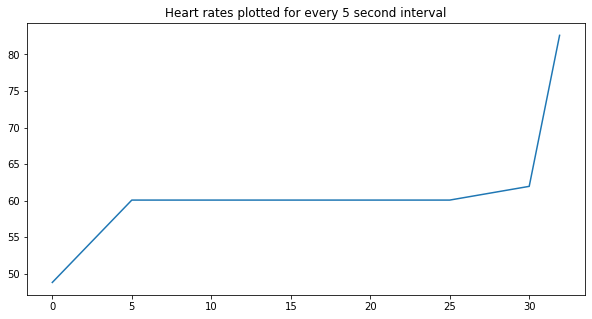

chunk:  13%|█▎        | 93/704 [00:00<00:00, 921.90it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/957 [00:00<00:54, 17.54it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
720 480 30


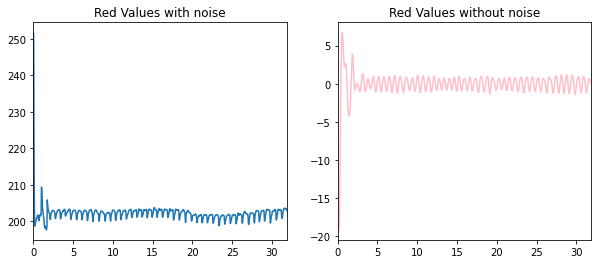

Heart rate= 82.6722338204593


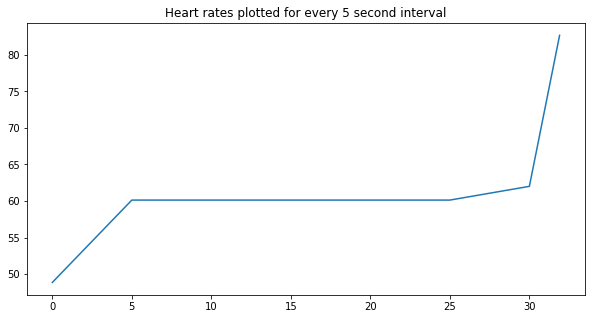

chunk:   0%|          | 0/704 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/479 [00:00<00:35, 13.33it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 5
720 480 15


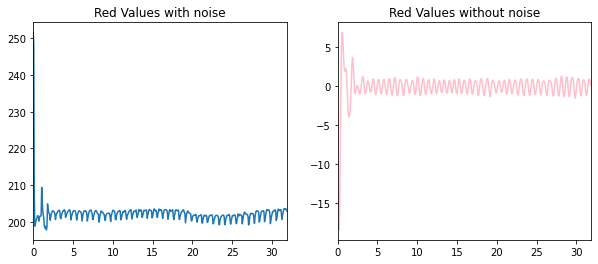

Heart rate= 82.5


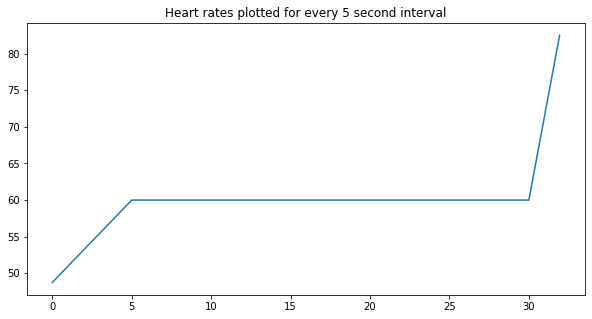

*******************
Video number: 6
1920 1080 59


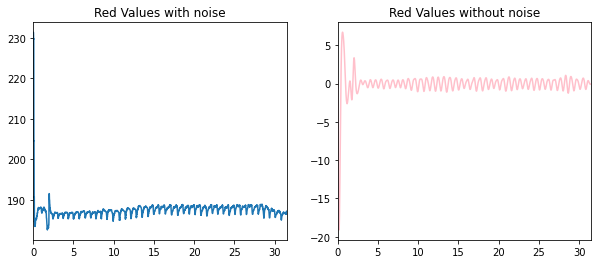

Heart rate= 83.65198711063373


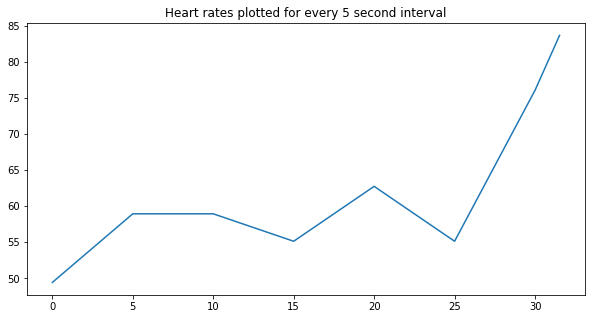

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 81.37931034482759, 82.61474269819193, 82.6722338204593, 82.5, 81.37931034482759, 82.614

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1396 [00:00<00:24, 55.80it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 6
1080 1920 45


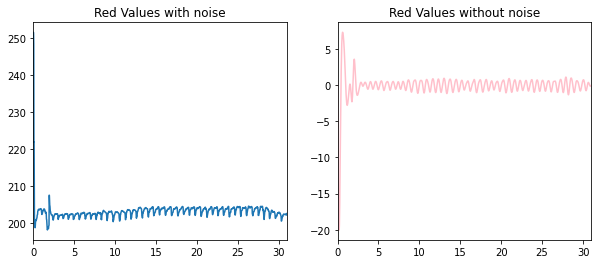

Heart rate= 84.97854077253218


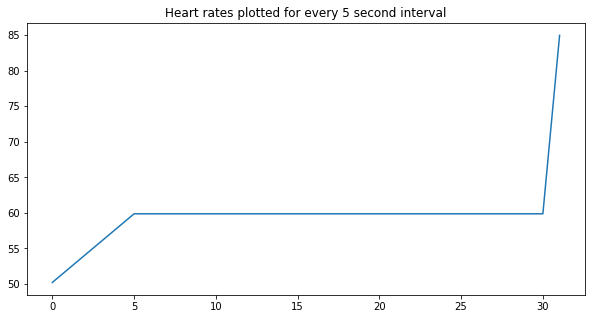

chunk:  15%|█▌        | 104/684 [00:00<00:00, 1038.50it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/931 [00:00<00:48, 19.26it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 6
1080 1920 30


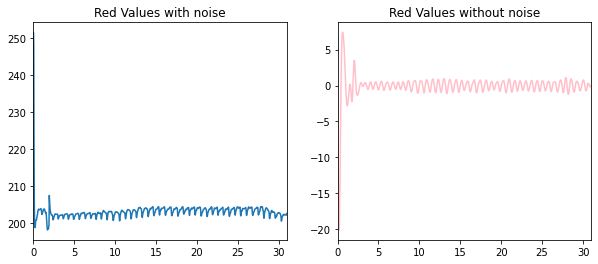

Heart rate= 83.04721030042917


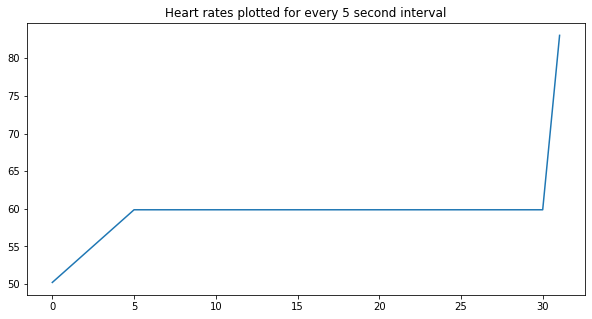

chunk:  17%|█▋        | 113/684 [00:00<00:00, 1120.95it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/466 [00:00<00:23, 19.60it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 6
1080 1920 15


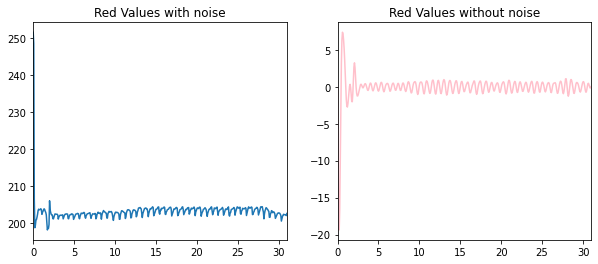

Heart rate= 82.69230769230771


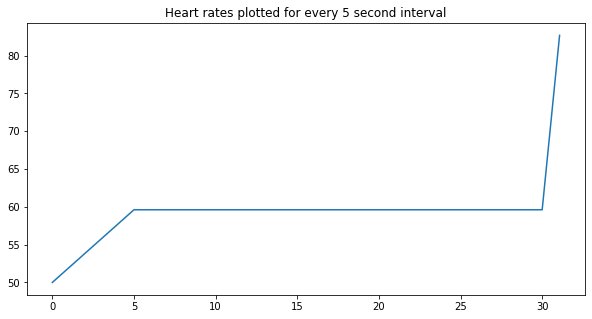

chunk:  12%|█▏        | 85/684 [00:00<00:00, 848.35it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1860 [00:00<00:35, 52.75it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:6
1280 720 59


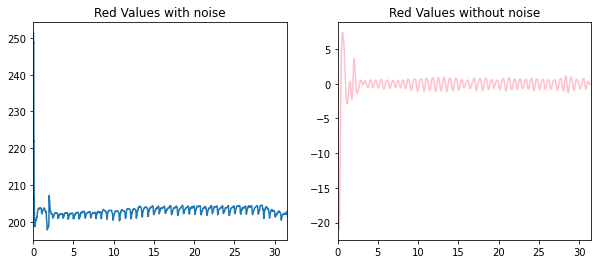

Heart rate= 83.65198711063373


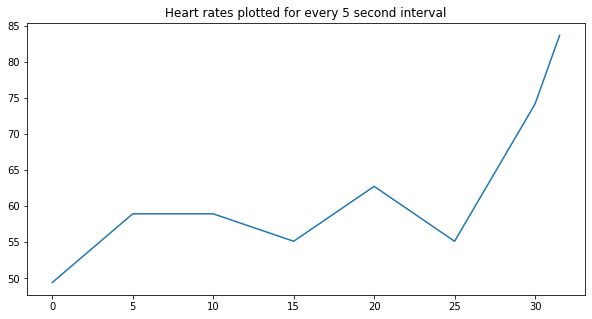

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/1396 [00:00<00:57, 24.23it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
1280 720 45


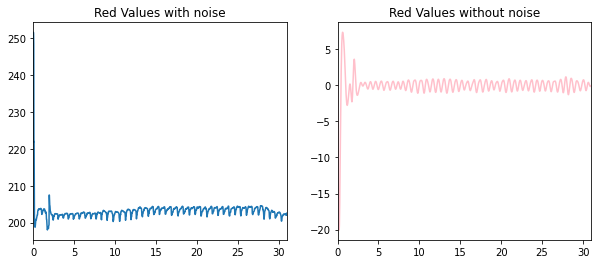

Heart rate= 84.97854077253218


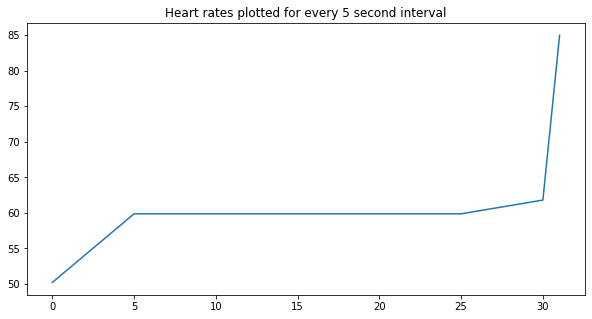

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/931 [00:00<00:49, 18.63it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
1280 720 30


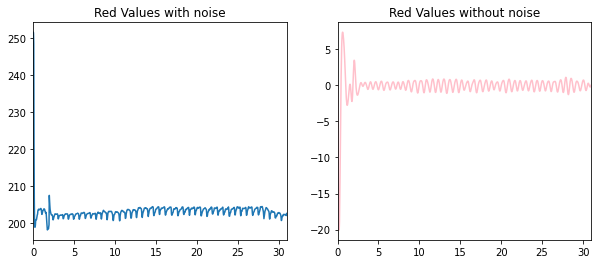

Heart rate= 83.04721030042917


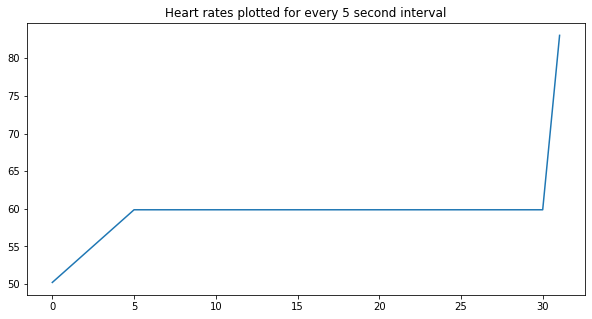

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/466 [00:00<00:26, 17.81it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
1280 720 15


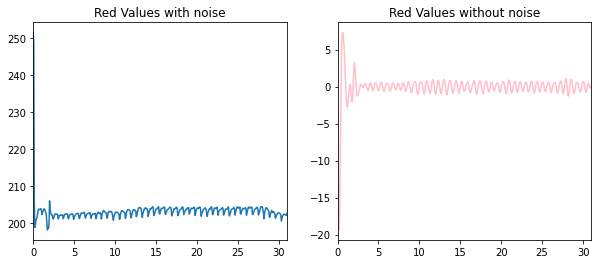

Heart rate= 82.69230769230771


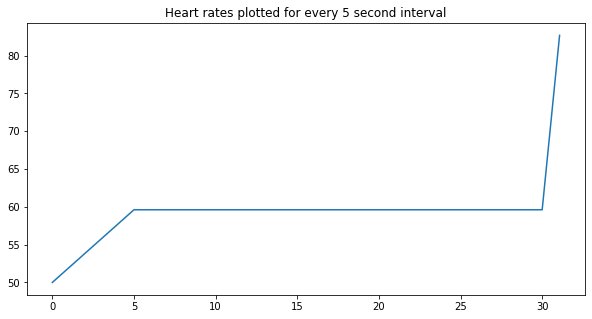

*******************
*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1860 [00:00<00:35, 52.70it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
720 480 59


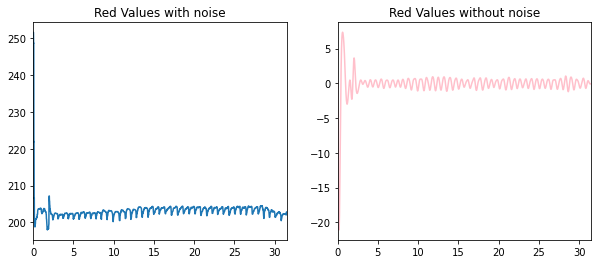

Heart rate= 81.75080558539204


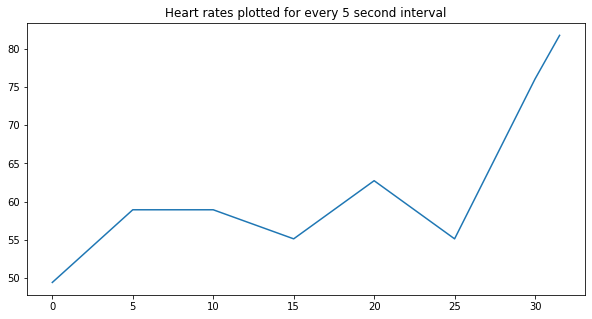

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/1396 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
720 480 45


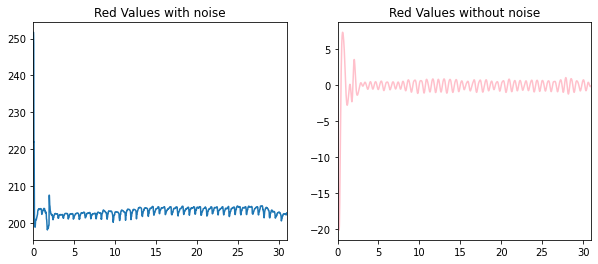

Heart rate= 84.97854077253218


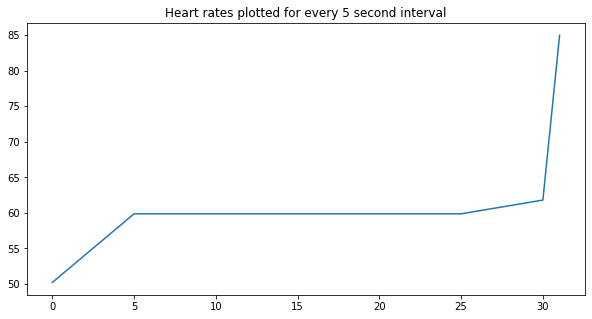

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/931 [00:00<00:56, 16.51it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
720 480 30


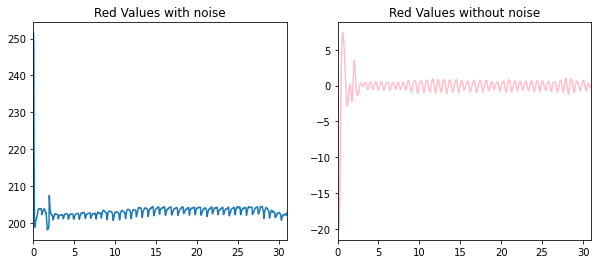

Heart rate= 83.04721030042917


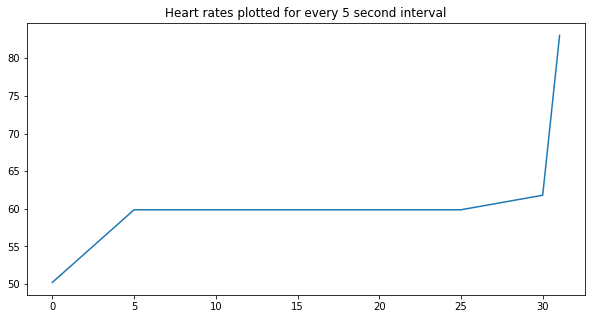

chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/466 [00:00<00:25, 18.55it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 6
720 480 15


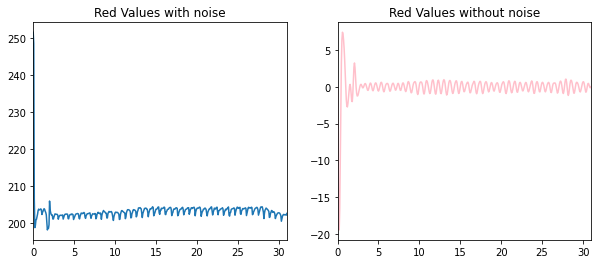

Heart rate= 82.69230769230771


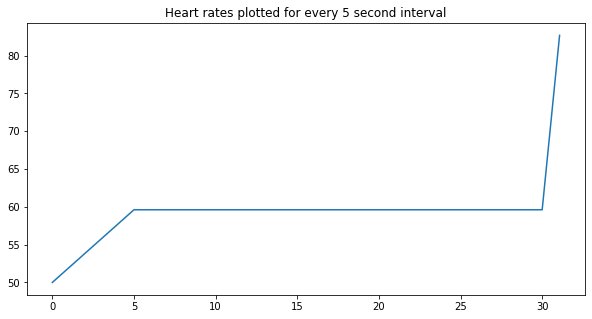

*******************
Video number: 7
1920 1080 59


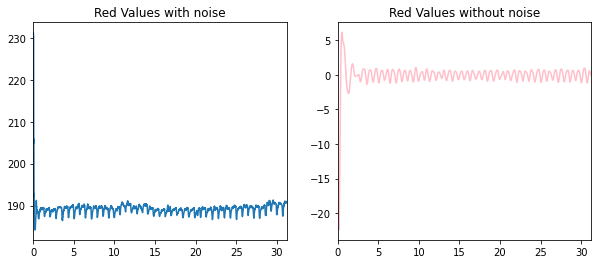

Heart rate= 84.37703141928495


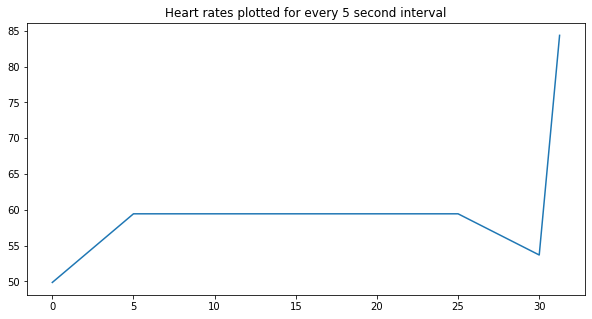

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 81.37931034482759, 82.61474269819193, 82.6722338204593, 82.5, 81.37931034482759, 82.614

chunk:   0%|          | 0/679 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1384 [00:00<00:26, 51.99it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 7
1080 1920 45


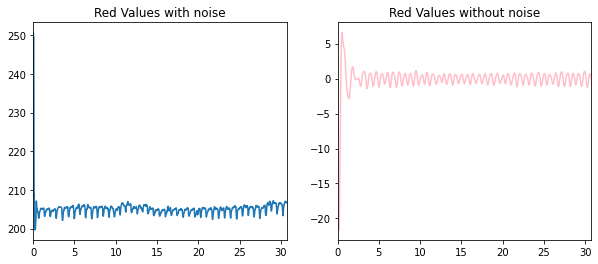

Heart rate= 85.71428571428571


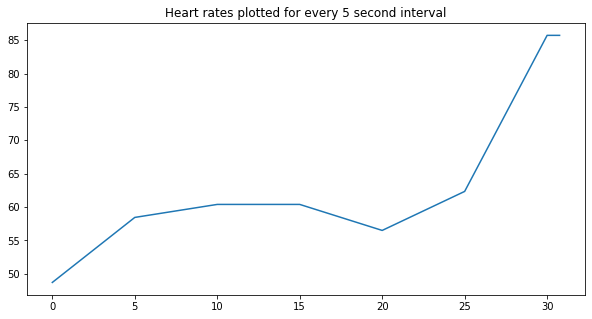

chunk:   0%|          | 0/679 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/923 [00:00<01:07, 13.72it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 7
1080 1920 30


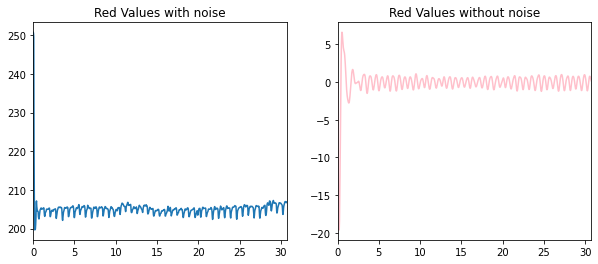

Heart rate= 85.71428571428571


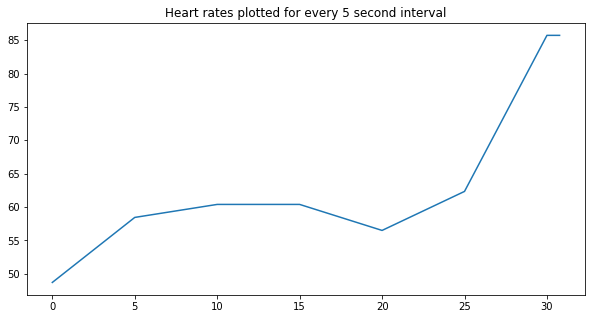

chunk:   9%|▉         | 62/679 [00:00<00:00, 619.55it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/462 [00:00<00:27, 16.89it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 7
1080 1920 15


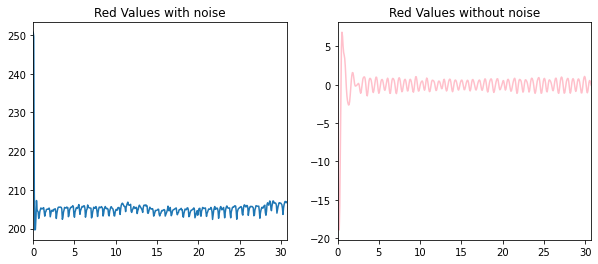

Heart rate= 85.3448275862069


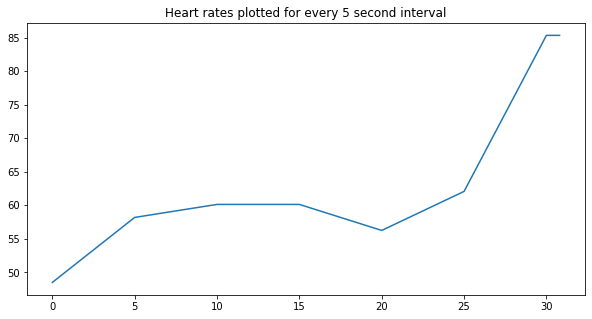

chunk:  10%|▉         | 66/679 [00:00<00:00, 655.40it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1844 [00:00<00:33, 54.43it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:7
1280 720 59


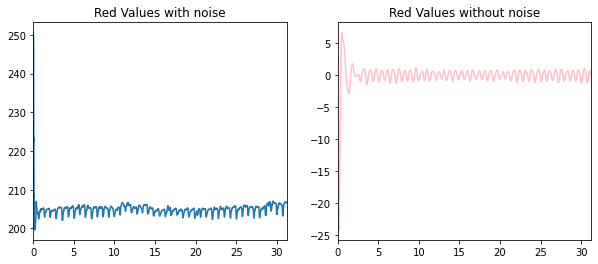

Heart rate= 84.37703141928495


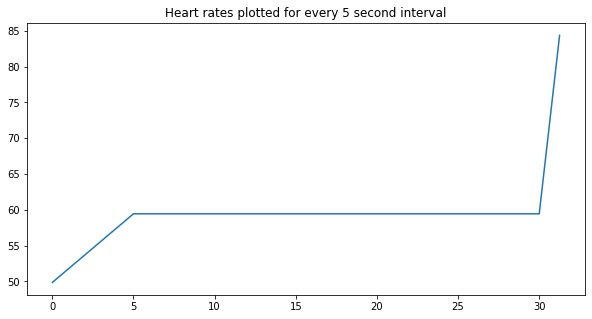

chunk:   0%|          | 0/679 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 3/1384 [00:00<00:59, 23.33it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
1280 720 45


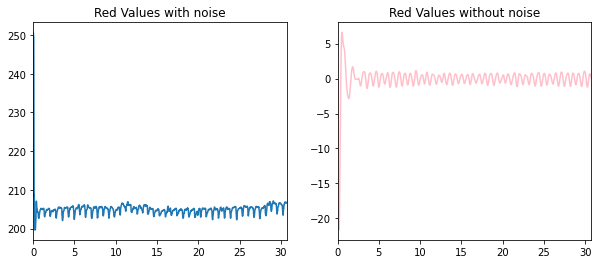

Heart rate= 85.71428571428571


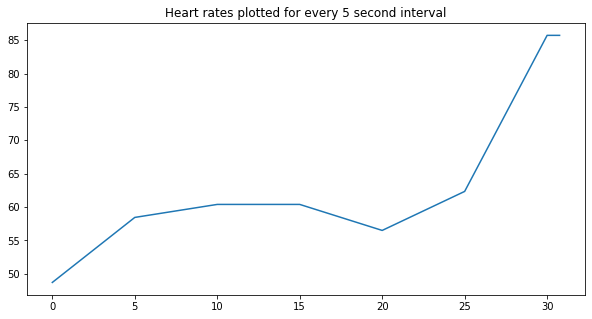

chunk:   5%|▍         | 32/679 [00:00<00:02, 260.27it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/923 [00:00<01:07, 13.58it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
1280 720 30


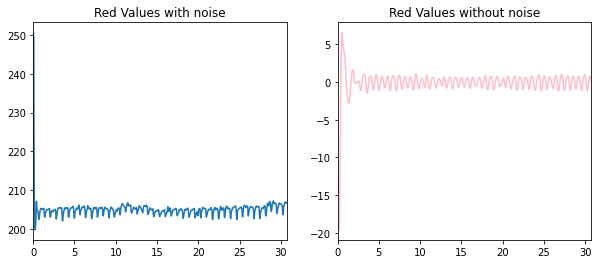

Heart rate= 85.71428571428571


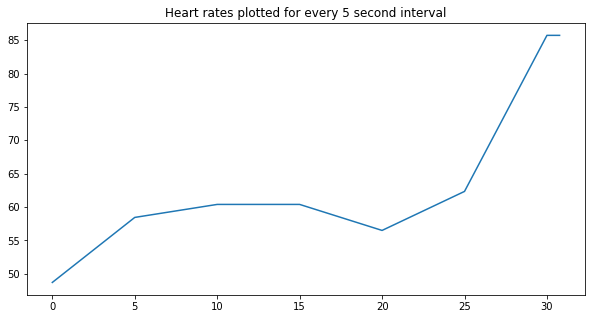

chunk:   0%|          | 0/679 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/462 [00:00<00:29, 15.76it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
1280 720 15


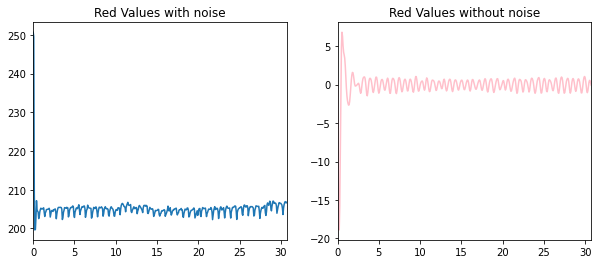

Heart rate= 85.3448275862069


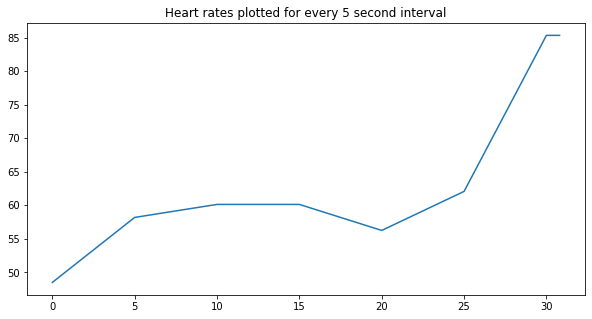

chunk:   0%|          | 0/679 [00:00<?, ?it/s, now=None]

*******************
*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1844 [00:00<00:34, 52.85it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
720 480 59


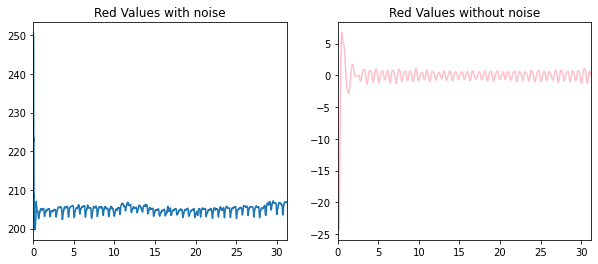

Heart rate= 84.37703141928495


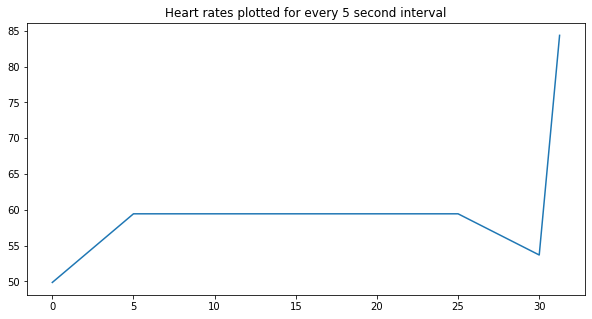

chunk:  13%|█▎        | 91/679 [00:00<00:00, 905.36it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1384 [00:00<01:42, 13.51it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
720 480 45


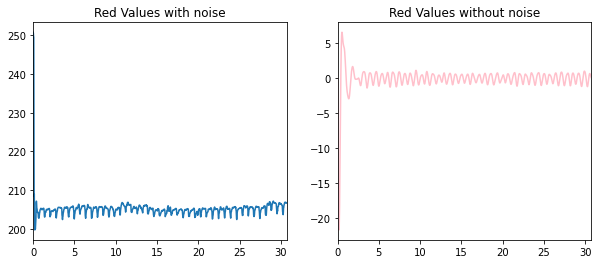

Heart rate= 85.71428571428571


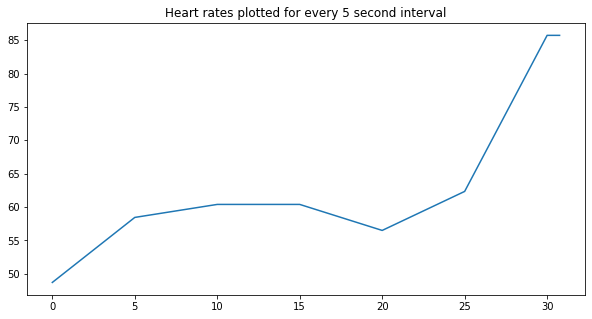

chunk:   6%|▌         | 41/679 [00:00<00:01, 409.63it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/923 [00:00<?, ?it/s, now=None]                

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
720 480 30


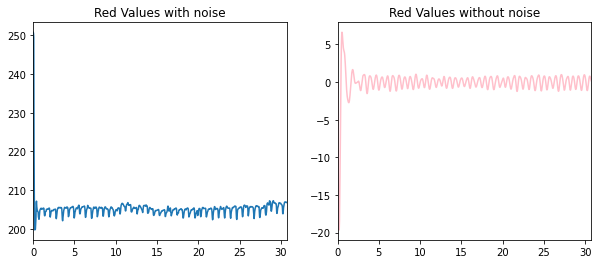

Heart rate= 85.71428571428571


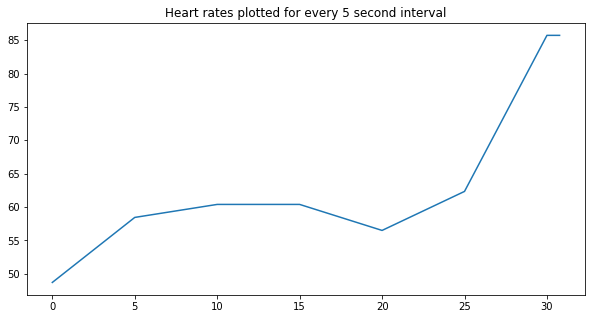

chunk:  17%|█▋        | 115/679 [00:00<00:00, 1138.91it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   1%|          | 3/462 [00:00<00:26, 17.46it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 7
720 480 15


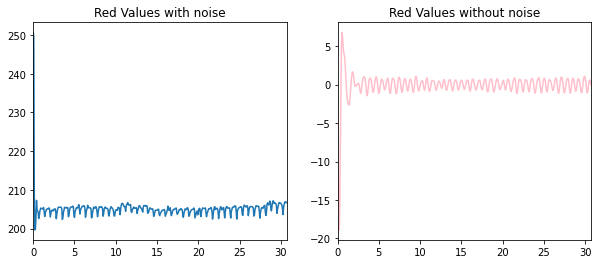

Heart rate= 85.3448275862069


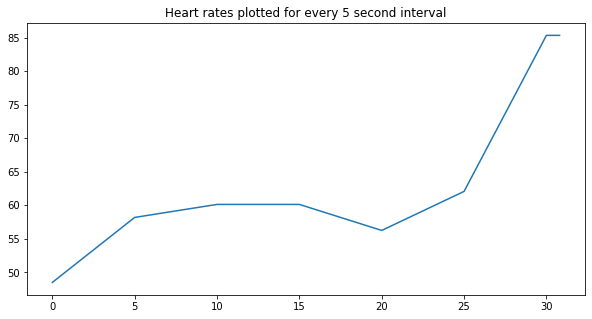

*******************
Video number: 8
1920 1080 59


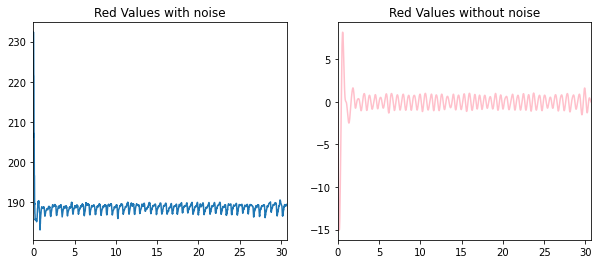

Heart rate= 89.76846747519292


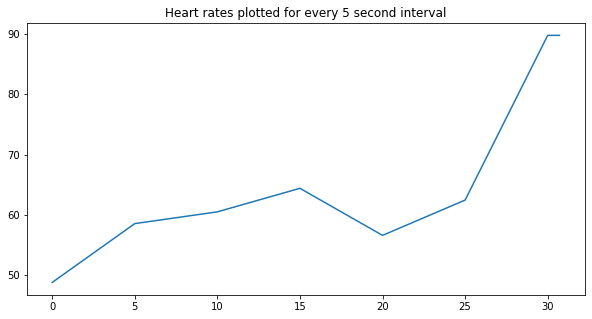

[84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 84.02476780185758, 85.30219780219781, 85.36082474226804, 85.18518518518519, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 76.71247357293868, 77.84810126582278, 77.84810126582279, 77.52100840336134, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 82.15189873417722, 83.42696629213484, 83.36842105263159, 83.19327731092437, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 84.83660130718954, 86.21190130624093, 86.08695652173913, 86.08695652173913, 81.37931034482759, 82.61474269819193, 82.6722338204593, 82.5, 81.37931034482759, 82.614

chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1360 [00:00<00:26, 52.03it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 8
1080 1920 45


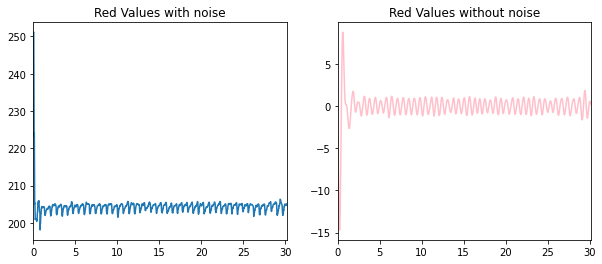

Heart rate= 91.18942731277534


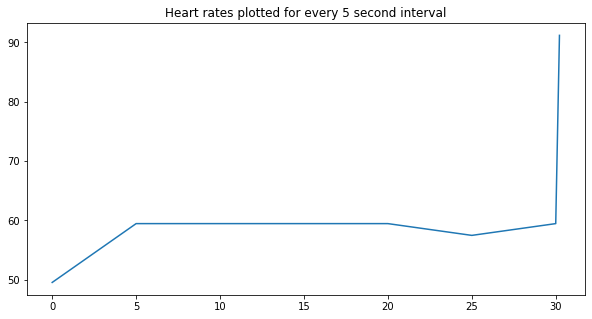

chunk:  15%|█▌        | 101/667 [00:00<00:00, 1001.45it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/907 [00:00<00:45, 19.81it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 8
1080 1920 30


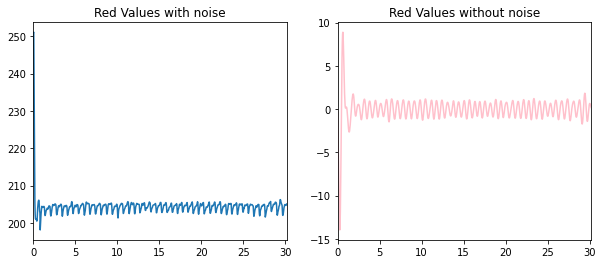

Heart rate= 91.18942731277534


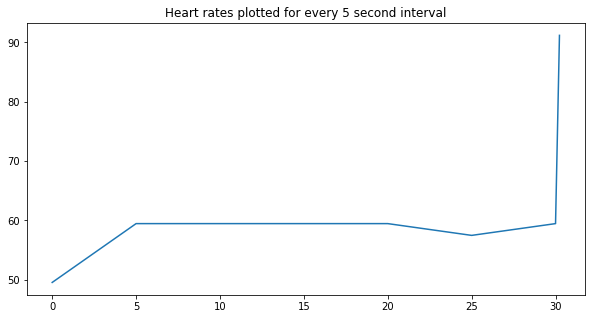

chunk:  15%|█▌        | 101/667 [00:00<00:00, 1004.58it/s, now=None]

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   1%|          | 3/454 [00:00<00:25, 17.73it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number: 8
1080 1920 15


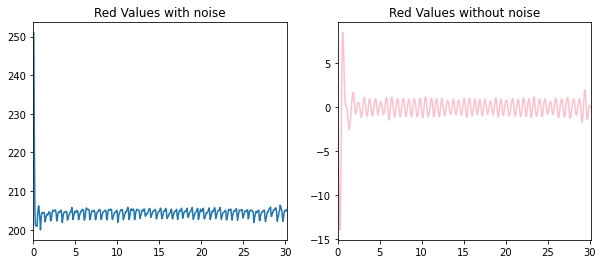

Heart rate= 90.78947368421052


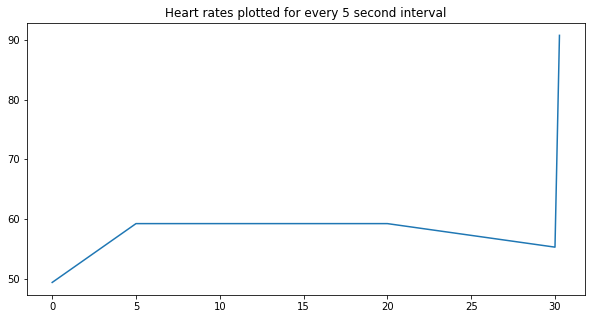

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 6/1812 [00:00<00:32, 55.15it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
*******************
Video number:8
1280 720 59


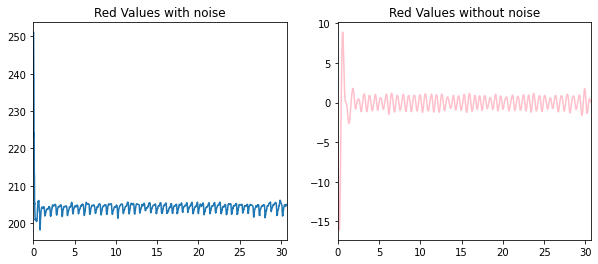

Heart rate= 89.76846747519292


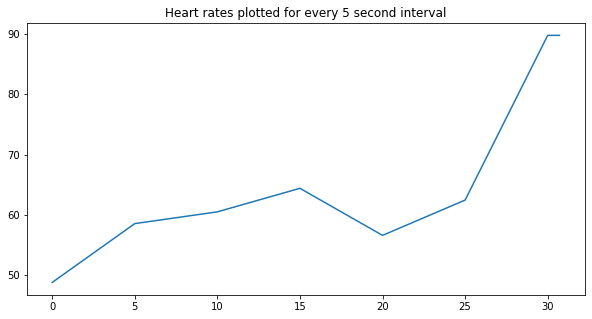

chunk:  11%|█         | 75/667 [00:00<00:00, 742.38it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1360 [00:00<01:12, 18.72it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
1280 720 45


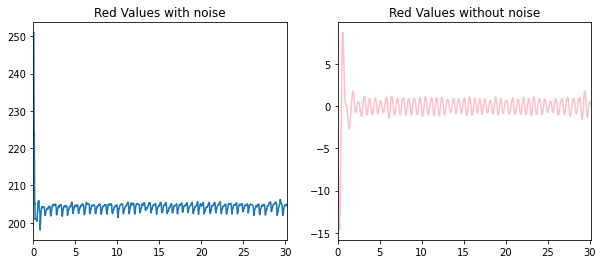

Heart rate= 91.18942731277534


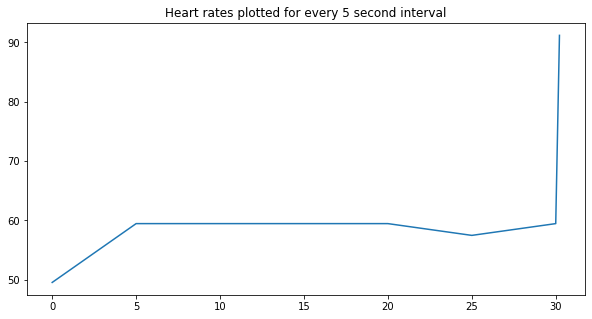

chunk:  15%|█▌        | 102/667 [00:00<00:00, 1002.91it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/907 [00:00<00:47, 18.91it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
1280 720 30


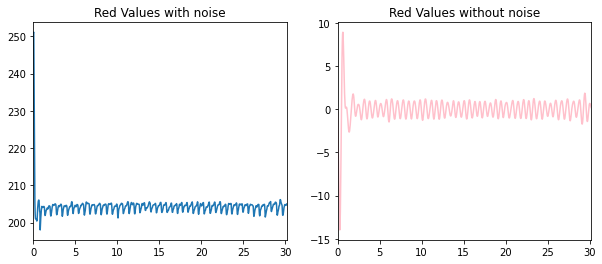

Heart rate= 91.18942731277534


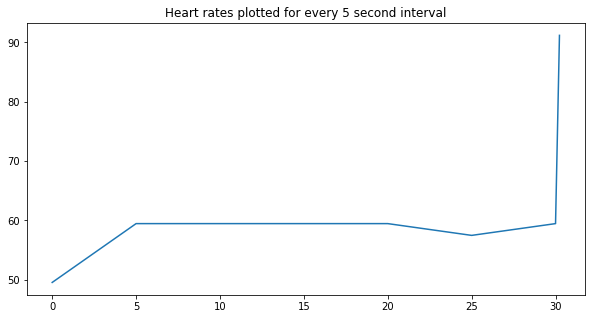

chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/454 [00:00<00:29, 15.44it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
1280 720 15


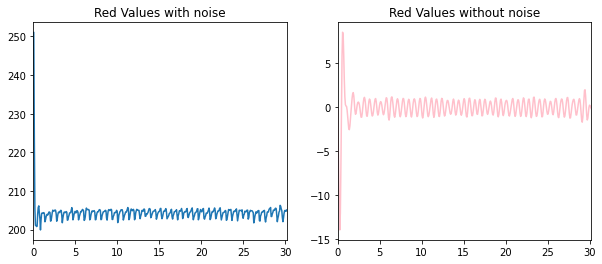

Heart rate= 90.78947368421052


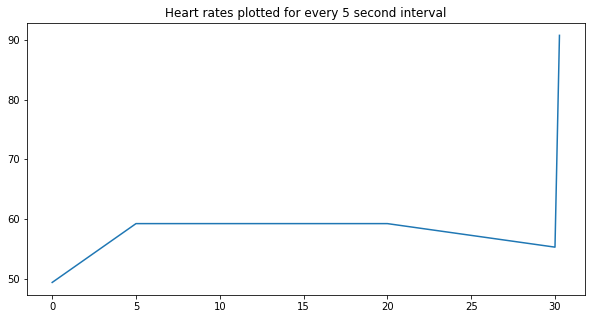

*******************


chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 5/1812 [00:00<00:38, 47.42it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
720 480 59


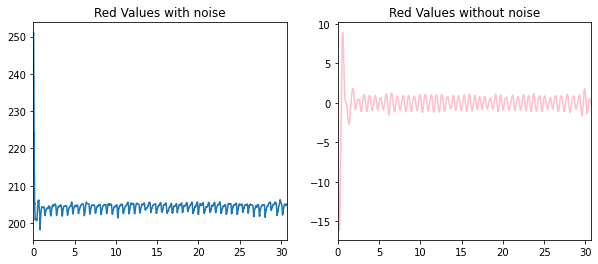

Heart rate= 89.76846747519292


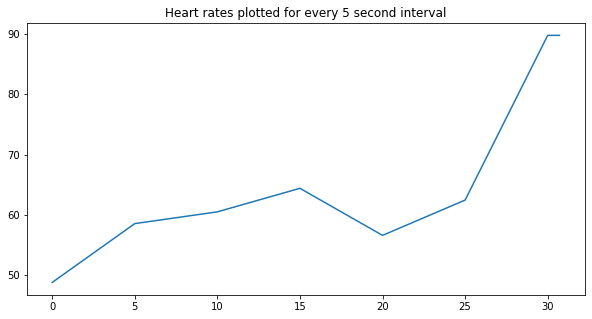

chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1360 [00:00<01:35, 14.23it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
720 480 45


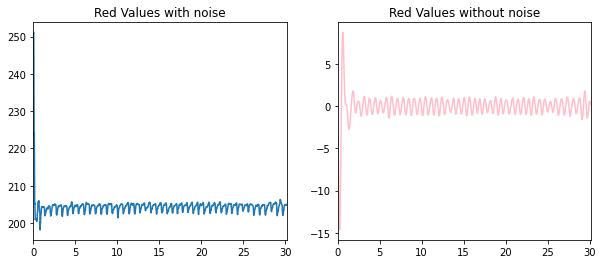

Heart rate= 91.18942731277534


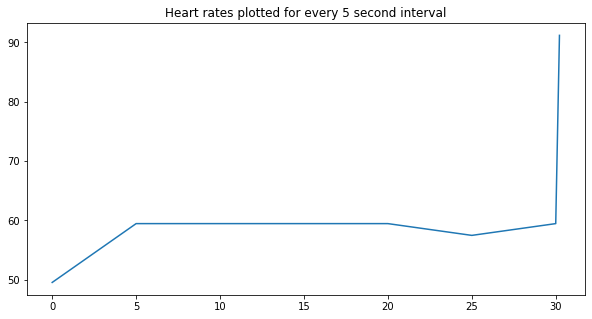

chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/907 [00:00<01:21, 11.11it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
Video number: 8
720 480 30


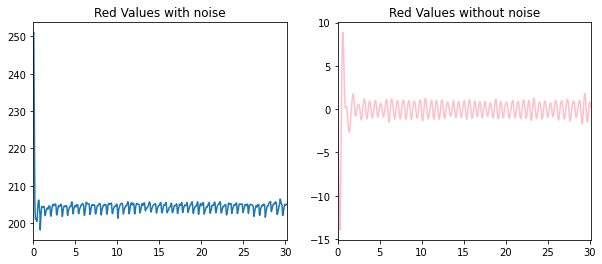

Heart rate= 91.18942731277534


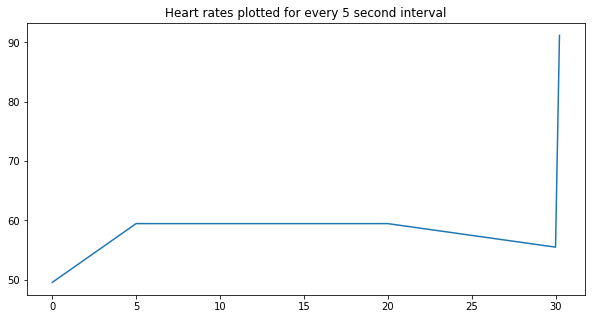

chunk:   0%|          | 0/667 [00:00<?, ?it/s, now=None]

*******************
Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/454 [00:00<?, ?it/s, now=None]                

MoviePy - Done.
Moviepy - Writing video temp.mp4



t:  11%|█         | 51/454 [00:07<00:49,  8.17it/s, now=None]

KeyboardInterrupt: 

In [30]:
l=['Sample1.MOV','Sample2.MOV','Sample3.MOV','Sample4.MOV','Sample5.MOV','Sample6.MOV','Sample7.MOV','Sample8.MOV','Sample9.MOV','Sample10.MOV']
dft_values = []
for i in range(len(l)):
    print('*******************')
    print("Video number: {}".format(i+1))
    dft_values.append(dft(l[i]))#1080p 60fps
    print(dft_values)
    clip = mp.VideoFileClip(l[i])
    clip.write_videofile("temp.mp4", fps=45)
    print('*******************')
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#1080p 45fps
    clip.write_videofile("temp.mp4", fps=30)
    print('*******************')
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#1080p 30fps
    clip.write_videofile("temp.mp4", fps=15)
    print('*******************')
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#1080p 15fps

    
    #  720p resolution
    clip_resized = clip.resize(newsize=(720,1280))
    clip_resized.write_videofile("temp.mp4")
    print('*******************')
    print("Video number:{}".format(i+1))
    dft_values.append(dft("temp.mp4"))#720p 60fps
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4", fps=45)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#720p 25fps
    print('*******************')
   
    clip_resized.write_videofile("temp.mp4", fps=30)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#720p 20fps
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4", fps=15)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#720p 15fps
    print('*******************')
    
   # clip_resized.write_videofile("temp.mp4", fps=8)
   # print("Video number: {}".format(i+1))
   # dft_values.append(dft("temp.mp4"))#720p 8fps
    
    #480p resolution
    clip_resized = clip.resize(newsize=(480,720))
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4")
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#480p 60fps
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4", fps=45)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#480p 45fps
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4", fps=30)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))#480p 30fps
    print('*******************')
    
    clip_resized.write_videofile("temp.mp4", fps=15)
    print("Video number: {}".format(i+1))
    dft_values.append(dft("temp.mp4"))
    #clip_resized.write_videofile("temp.mp4", fps=8)
    #print("Video number: {}".format(i+1)
    #dft_values.append(dft("temp.mp4"))
print(dft_values)